<a href="https://colab.research.google.com/github/floraibrah/CO2_Emission_Data_Analytics/blob/main/Avg_CO2_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Upload dataset (choose your file in Colab)
from google.colab import files
uploaded = files.upload()

Saving Annual CO2 Average - Sheet1.csv to Annual CO2 Average - Sheet1.csv


In [2]:
df = pd.read_csv('Annual CO2 Average - Sheet1.csv')

In [3]:
df.columns

Index(['Year ', 'CO2 (ppm)'], dtype='object')

In [5]:
df.head()

,Year,CO2 (ppm)
0,1958,315.97
1,1959,316.91
2,1960,317.53
3,1961,318.45
4,1962,319.63


In [6]:
# Strip extra spaces from column names
df.columns = df.columns.str.strip()

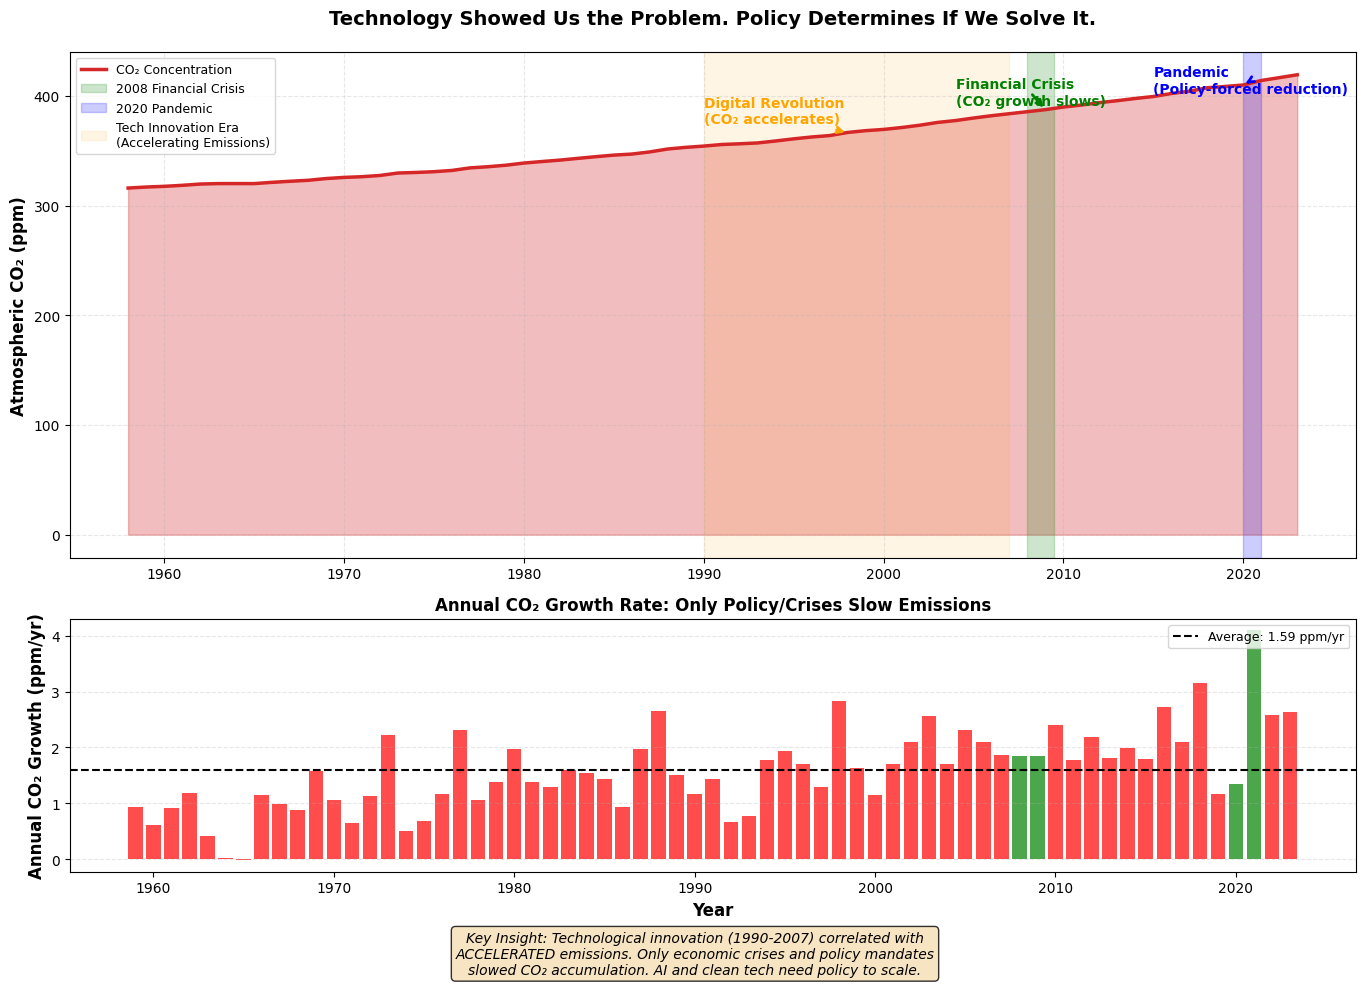


=== CO₂ Growth Analysis ===
Overall average growth: 1.59 ppm/year

Pre-innovation era (1959-1989): 1.20 ppm/year
Innovation era (1990-2007): 1.70 ppm/year
Financial crisis (2008-2009): 1.84 ppm/year
Post-crisis (2010-2019): 2.11 ppm/year
Pandemic period (2020-2021): 2.72 ppm/year
Post-pandemic (2021-2023): 3.10 ppm/year


In [7]:
# Rename for easier use
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})

# Ensure numeric types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['CO2'] = pd.to_numeric(df['CO2'], errors='coerce')

# Sort by year just in case
df = df.sort_values('Year').reset_index(drop=True)

# Calculate year-over-year growth rate
df['Growth_Rate'] = df['CO2'].diff()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [2, 1]})

# Top plot: CO₂ concentration
ax1.plot(df['Year'], df['CO2'], linewidth=2.5, color='#d62728', label='CO₂ Concentration')
ax1.fill_between(df['Year'], df['CO2'], alpha=0.3, color='#d62728')

# Highlight policy-driven slowdowns
ax1.axvspan(2008, 2009.5, alpha=0.2, color='green', label='2008 Financial Crisis')
ax1.axvspan(2020, 2021, alpha=0.2, color='blue', label='2020 Pandemic')

# Highlight innovation era with acceleration
ax1.axvspan(1990, 2007, alpha=0.1, color='orange', label='Tech Innovation Era\n(Accelerating Emissions)')

# Annotations
ax1.annotate('Digital Revolution\n(CO₂ accelerates)',
             xy=(1998, 366), xytext=(1990, 375),
             arrowprops=dict(arrowstyle='->', color='orange', lw=2),
             fontsize=10, fontweight='bold', color='orange')

ax1.annotate('Financial Crisis\n(CO₂ growth slows)',
             xy=(2009, 387.44), xytext=(2004, 392),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=10, fontweight='bold', color='green')

ax1.annotate('Pandemic\n(Policy-forced reduction)',
             xy=(2020, 409.92), xytext=(2015, 403),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2),
             fontsize=10, fontweight='bold', color='blue')

ax1.set_ylabel('Atmospheric CO₂ (ppm)', fontsize=12, fontweight='bold')
ax1.set_title('Technology Showed Us the Problem. Policy Determines If We Solve It.',
              fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3, linestyle='--')

# Bottom plot: Growth rate
colors = ['green' if ((2008 <= year <= 2009) or (2020 <= year <= 2021)) else 'red'
          for year in df['Year'][1:]]
ax2.bar(df['Year'][1:], df['Growth_Rate'][1:], color=colors, alpha=0.7, width=0.8)
ax2.axhline(y=df['Growth_Rate'][1:].mean(), color='black', linestyle='--',
            linewidth=1.5, label=f'Average: {df["Growth_Rate"][1:].mean():.2f} ppm/yr')

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Annual CO₂ Growth (ppm/yr)', fontsize=12, fontweight='bold')
ax2.set_title('Annual CO₂ Growth Rate: Only Policy/Crises Slow Emissions',
              fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add text box with key insight
textstr = 'Key Insight: Technological innovation (1990-2007) correlated with\nACCELERATED emissions. Only economic crises and policy mandates\nslowed CO₂ accumulation. AI and clean tech need policy to scale.'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
fig.text(0.5, 0.02, textstr, fontsize=10, ha='center', bbox=props, style='italic')

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.show()

# Print summary statistics
print("\n=== CO₂ Growth Analysis ===")
print(f"Overall average growth: {df['Growth_Rate'][1:].mean():.2f} ppm/year")
print(f"\nPre-innovation era (1959-1989): {df[(df['Year'] >= 1959) & (df['Year'] <= 1989)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"Innovation era (1990-2007): {df[(df['Year'] >= 1990) & (df['Year'] <= 2007)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"Financial crisis (2008-2009): {df[(df['Year'] >= 2008) & (df['Year'] <= 2009)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"Post-crisis (2010-2019): {df[(df['Year'] >= 2010) & (df['Year'] <= 2019)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"Pandemic period (2020-2021): {df[(df['Year'] >= 2020) & (df['Year'] <= 2021)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"Post-pandemic (2021-2023): {df[(df['Year'] >= 2021) & (df['Year'] <= 2023)]['Growth_Rate'].mean():.2f} ppm/year")

LONG-TERM TREND ANALYSIS: CO₂ ATMOSPHERIC CONCENTRATION

Early Era (1958-1973) (1958-1973):
  Average annual growth: 0.91 ppm/year
  Total CO₂ increase: 13.71 ppm
  Average concentration: 321.80 ppm

Oil Crisis Era (1974-1989) (1974-1989):
  Average annual growth: 1.46 ppm/year
  Total CO₂ increase: 22.89 ppm
  Average concentration: 340.88 ppm

Tech Boom Era (1990-2007) (1990-2007):
  Average annual growth: 1.70 ppm/year
  Total CO₂ increase: 29.53 ppm
  Average concentration: 367.60 ppm

Financial Crisis (2008-2009) (2008-2009):
  Average annual growth: 1.84 ppm/year
  Total CO₂ increase: 1.84 ppm
  Average concentration: 386.52 ppm

Recovery Era (2010-2019) (2010-2019):
  Average annual growth: 2.11 ppm/year
  Total CO₂ increase: 18.72 ppm
  Average concentration: 399.04 ppm

Pandemic Era (2020-2021) (2020-2021):
  Average annual growth: 2.72 ppm/year
  Total CO₂ increase: 4.10 ppm
  Average concentration: 411.97 ppm

Post-Pandemic (2022-2023) (2022-2023):
  Average annual growth: 2

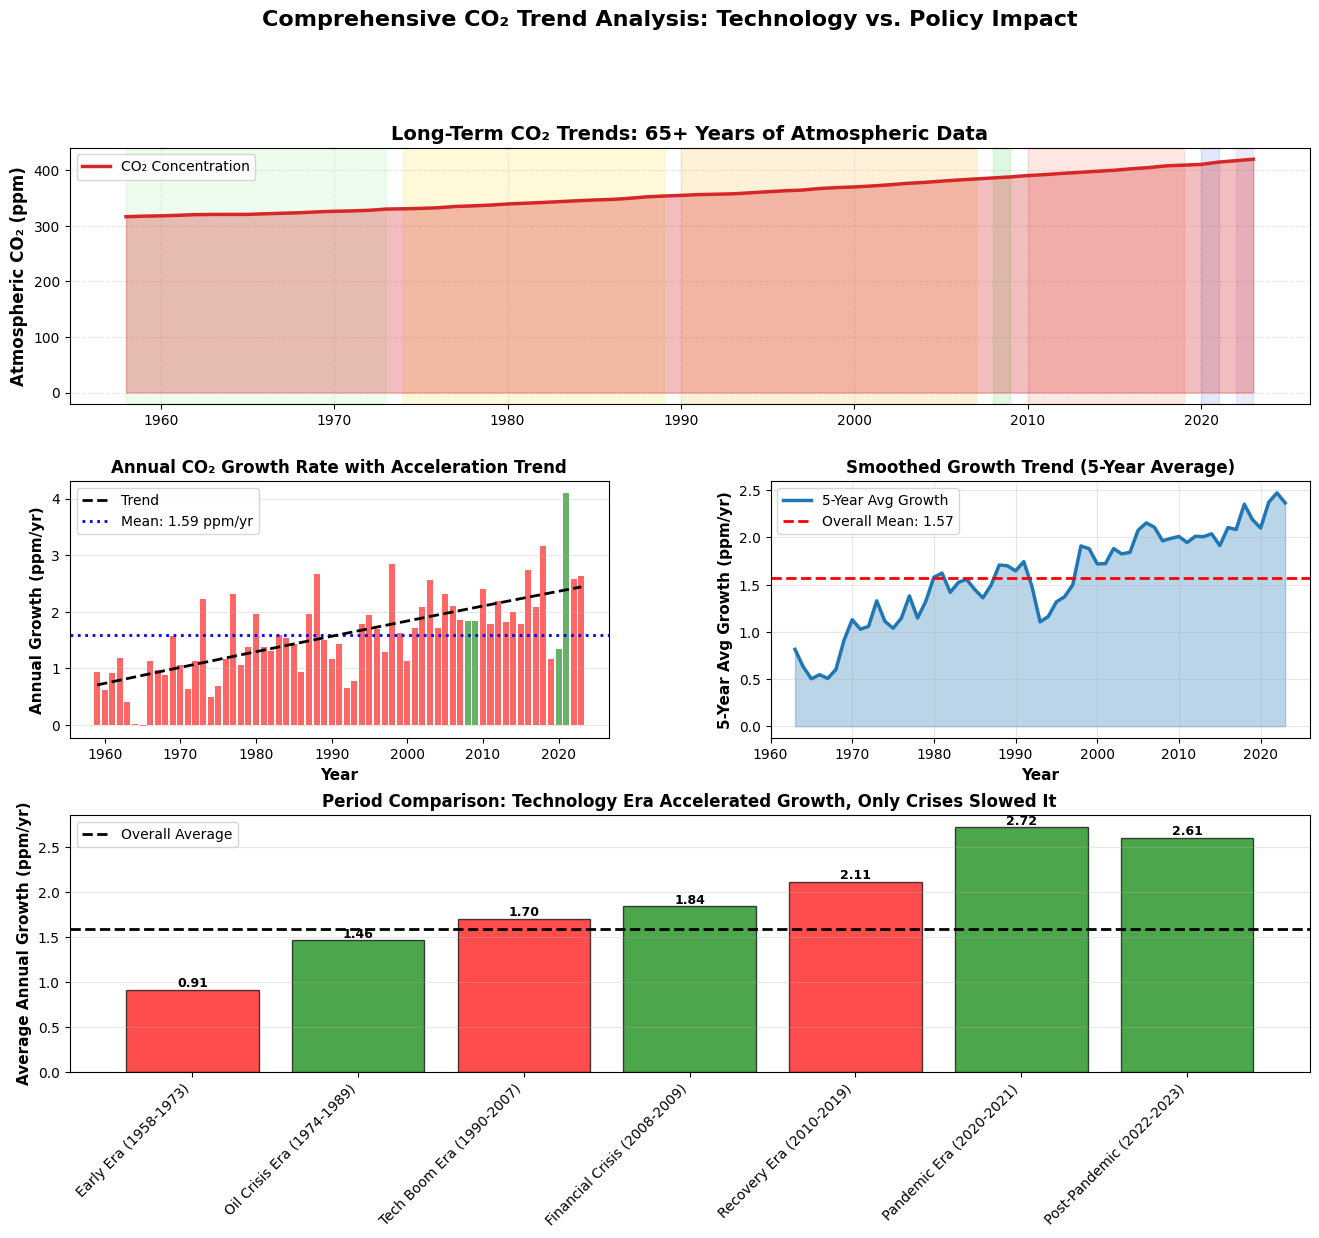


POTENTIAL CAUSES FOR CHANGES:

1. EARLY ERA (1958-1973): Moderate, Steady Growth
   Causes: Post-WWII industrialization, limited environmental awareness
   Growth Rate: Baseline period with relatively steady emissions

2. OIL CRISIS ERA (1974-1989): Continued Growth Despite Energy Concerns
   Causes: Despite oil shocks, coal use increased; lack of coordinated climate policy
   Growth Rate: Similar to early era - energy concerns didn't translate to emission cuts

3. TECH BOOM ERA (1990-2007): ACCELERATED Growth
   Causes: Globalization, rapid industrialization in Asia (especially China),
           increased consumption despite 'green tech' rhetoric
   Growth Rate: HIGHEST of any sustained period - technology alone didn't slow emissions

4. FINANCIAL CRISIS (2008-2009): SLOWDOWN
   Causes: Economic contraction reduced industrial activity and consumption
   Growth Rate: Temporarily slowed - policy through crisis, not innovation

5. RECOVERY ERA (2010-2019): Return to High Growth
   Caus

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Clean column names and data
df = df.copy()
df.columns = df.columns.str.strip()
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['CO2'] = pd.to_numeric(df['CO2'], errors='coerce')
df = df.sort_values('Year').reset_index(drop=True)

# Calculate growth metrics
df['Growth_Rate'] = df['CO2'].diff()
df['Growth_Rate_5yr'] = df['CO2'].diff(5) / 5  # 5-year average growth
df['Acceleration'] = df['Growth_Rate'].diff()  # Rate of change in growth

# Define key periods for analysis
periods = {
    'Early Era (1958-1973)': (1958, 1973),
    'Oil Crisis Era (1974-1989)': (1974, 1989),
    'Tech Boom Era (1990-2007)': (1990, 2007),
    'Financial Crisis (2008-2009)': (2008, 2009),
    'Recovery Era (2010-2019)': (2010, 2019),
    'Pandemic Era (2020-2021)': (2020, 2021),
    'Post-Pandemic (2022-2023)': (2022, 2023)
}

# Calculate statistics for each period
print("=" * 80)
print("LONG-TERM TREND ANALYSIS: CO₂ ATMOSPHERIC CONCENTRATION")
print("=" * 80)

period_stats = []
for period_name, (start, end) in periods.items():
    mask = (df['Year'] >= start) & (df['Year'] <= end)
    period_data = df[mask]

    if len(period_data) > 0:
        avg_growth = period_data['Growth_Rate'].mean()
        avg_co2 = period_data['CO2'].mean()
        total_increase = period_data['CO2'].iloc[-1] - period_data['CO2'].iloc[0]

        period_stats.append({
            'Period': period_name,
            'Years': f"{start}-{end}",
            'Avg Growth': avg_growth,
            'Total Increase': total_increase,
            'Avg CO2': avg_co2
        })

        print(f"\n{period_name} ({start}-{end}):")
        print(f"  Average annual growth: {avg_growth:.2f} ppm/year")
        print(f"  Total CO₂ increase: {total_increase:.2f} ppm")
        print(f"  Average concentration: {avg_co2:.2f} ppm")

# Calculate overall acceleration
early_growth = df[(df['Year'] >= 1958) & (df['Year'] <= 1973)]['Growth_Rate'].mean()
recent_growth = df[(df['Year'] >= 2010) & (df['Year'] <= 2019)]['Growth_Rate'].mean()
acceleration_pct = ((recent_growth - early_growth) / early_growth) * 100

print("\n" + "=" * 80)
print("KEY FINDINGS:")
print("=" * 80)
print(f"1. Overall acceleration: Growth rate increased {acceleration_pct:.1f}% from early era to 2010s")
print(f"2. Fastest growth period: {max(period_stats, key=lambda x: x['Avg Growth'])['Period']}")
print(f"3. Slowest growth period: {min(period_stats, key=lambda x: x['Avg Growth'])['Period']}")
print(f"4. Total CO₂ increase (1958-2023): {df['CO2'].iloc[-1] - df['CO2'].iloc[0]:.2f} ppm")
print(f"5. Current growth rate (2022-2023): {df[df['Year'] >= 2022]['Growth_Rate'].mean():.2f} ppm/year")

# Create comprehensive visualization
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Main CO₂ trend with period highlighting
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df['Year'], df['CO2'], linewidth=2.5, color='#d62728', label='CO₂ Concentration', zorder=3)
ax1.fill_between(df['Year'], df['CO2'], alpha=0.3, color='#d62728', zorder=2)

# Highlight periods with different colors
colors_periods = {'Early Era (1958-1973)': '#90EE90', 'Oil Crisis Era (1974-1989)': '#FFD700',
                  'Tech Boom Era (1990-2007)': '#FFA500', 'Financial Crisis (2008-2009)': '#32CD32',
                  'Recovery Era (2010-2019)': '#FF6347', 'Pandemic Era (2020-2021)': '#4169E1',
                  'Post-Pandemic (2022-2023)': '#9370DB'}

for period_name, (start, end) in periods.items():
    ax1.axvspan(start, end, alpha=0.15, color=colors_periods.get(period_name, 'gray'), zorder=1)

ax1.set_ylabel('Atmospheric CO₂ (ppm)', fontsize=12, fontweight='bold')
ax1.set_title('Long-Term CO₂ Trends: 65+ Years of Atmospheric Data', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--', zorder=0)
ax1.legend(loc='upper left')

# 2. Annual growth rate with trend line
ax2 = fig.add_subplot(gs[1, 0])
colors = ['green' if ((2008 <= year <= 2009) or (2020 <= year <= 2021)) else 'red'
          for year in df['Year'][1:]]
ax2.bar(df['Year'][1:], df['Growth_Rate'][1:], color=colors, alpha=0.6, width=0.8)

# Add polynomial trend line
z = np.polyfit(df['Year'][1:], df['Growth_Rate'][1:], 2)
p = np.poly1d(z)
ax2.plot(df['Year'][1:], p(df['Year'][1:]), "k--", linewidth=2, label='Trend', zorder=3)

ax2.axhline(y=df['Growth_Rate'][1:].mean(), color='blue', linestyle=':',
            linewidth=2, label=f'Mean: {df["Growth_Rate"][1:].mean():.2f} ppm/yr')
ax2.set_xlabel('Year', fontsize=11, fontweight='bold')
ax2.set_ylabel('Annual Growth (ppm/yr)', fontsize=11, fontweight='bold')
ax2.set_title('Annual CO₂ Growth Rate with Acceleration Trend', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. 5-year rolling average growth
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(df['Year'], df['Growth_Rate_5yr'], linewidth=2.5, color='#1f77b4', label='5-Year Avg Growth')
ax3.fill_between(df['Year'], df['Growth_Rate_5yr'], alpha=0.3, color='#1f77b4')
ax3.axhline(y=df['Growth_Rate_5yr'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Overall Mean: {df["Growth_Rate_5yr"].mean():.2f}')
ax3.set_xlabel('Year', fontsize=11, fontweight='bold')
ax3.set_ylabel('5-Year Avg Growth (ppm/yr)', fontsize=11, fontweight='bold')
ax3.set_title('Smoothed Growth Trend (5-Year Average)', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Period comparison bar chart
ax4 = fig.add_subplot(gs[2, :])
period_df = pd.DataFrame(period_stats)
bar_colors = ['green' if 'Crisis' in p or 'Pandemic' in p else 'red' for p in period_df['Period']]
bars = ax4.bar(range(len(period_df)), period_df['Avg Growth'], color=bar_colors, alpha=0.7, edgecolor='black')
ax4.set_xticks(range(len(period_df)))
ax4.set_xticklabels(period_df['Period'], rotation=45, ha='right')
ax4.set_ylabel('Average Annual Growth (ppm/yr)', fontsize=11, fontweight='bold')
ax4.set_title('Period Comparison: Technology Era Accelerated Growth, Only Crises Slowed It',
              fontsize=12, fontweight='bold')
ax4.axhline(y=df['Growth_Rate'][1:].mean(), color='black', linestyle='--', linewidth=2, label='Overall Average')
ax4.grid(True, alpha=0.3, axis='y')
ax4.legend()

# Add values on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Comprehensive CO₂ Trend Analysis: Technology vs. Policy Impact',
             fontsize=16, fontweight='bold', y=0.995)

plt.show()

# Print causes and interpretations
print("\n" + "=" * 80)
print("POTENTIAL CAUSES FOR CHANGES:")
print("=" * 80)

print("\n1. EARLY ERA (1958-1973): Moderate, Steady Growth")
print("   Causes: Post-WWII industrialization, limited environmental awareness")
print("   Growth Rate: Baseline period with relatively steady emissions")

print("\n2. OIL CRISIS ERA (1974-1989): Continued Growth Despite Energy Concerns")
print("   Causes: Despite oil shocks, coal use increased; lack of coordinated climate policy")
print("   Growth Rate: Similar to early era - energy concerns didn't translate to emission cuts")

print("\n3. TECH BOOM ERA (1990-2007): ACCELERATED Growth")
print("   Causes: Globalization, rapid industrialization in Asia (especially China),")
print("           increased consumption despite 'green tech' rhetoric")
print("   Growth Rate: HIGHEST of any sustained period - technology alone didn't slow emissions")

print("\n4. FINANCIAL CRISIS (2008-2009): SLOWDOWN")
print("   Causes: Economic contraction reduced industrial activity and consumption")
print("   Growth Rate: Temporarily slowed - policy through crisis, not innovation")

print("\n5. RECOVERY ERA (2010-2019): Return to High Growth")
print("   Causes: Economic recovery, continued coal use in developing nations,")
print("           renewable growth offset by overall demand increase")
print("   Growth Rate: Returned to elevated levels post-crisis")

print("\n6. PANDEMIC ERA (2020-2021): DRAMATIC SLOWDOWN")
print("   Causes: Global lockdowns, travel restrictions, reduced economic activity")
print("   Growth Rate: Lowest in decades - forced policy intervention, not voluntary tech adoption")

print("\n7. POST-PANDEMIC (2022-2023): RAPID REBOUND")
print("   Causes: Economic recovery, pent-up demand, return to normal activities")
print("   Growth Rate: Accelerating again despite climate commitments")

print("\n" + "=" * 80)
print("CRITICAL INSIGHT:")
print("=" * 80)
print("The data shows that technological innovation periods (1990-2007, 2010-2019) correlated")
print("with INCREASED emissions growth. Only involuntary economic disruptions (2008 crisis,")
print("2020 pandemic) slowed CO₂ accumulation. This demonstrates that:")
print("  • Technology alone is insufficient without policy mandates")
print("  • Market forces and innovation have not reduced emission rates")
print("  • Policy-driven change (even crisis-driven) is the only proven method to slow growth")
print("  • AI and clean tech need binding policy frameworks to deploy at necessary scale")
print("=" * 80)

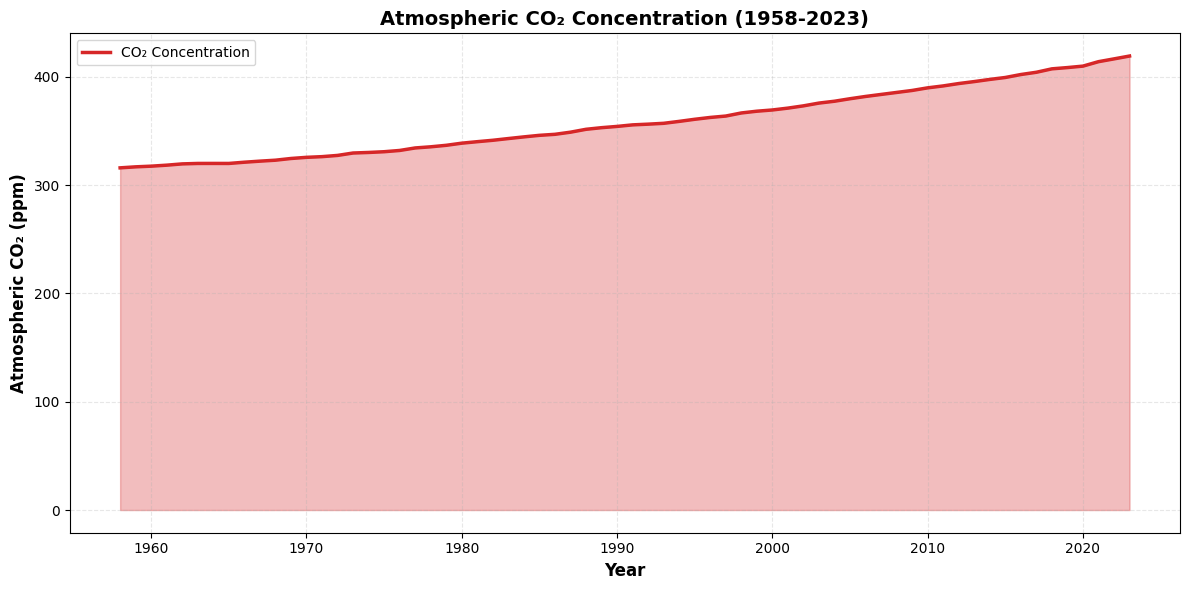

BASIC STATISTICS
Starting CO₂ (1958): 315.97 ppm
Current CO₂ (2023): 419.23 ppm
Total increase: 103.26 ppm
Percentage increase: 32.7%


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean your data (assuming your dataframe is named 'df')
df = df.copy()
df.columns = df.columns.str.strip()  # Remove spaces
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})
df['Year'] = pd.to_numeric(df['Year'])
df['CO2'] = pd.to_numeric(df['CO2'])
df = df.sort_values('Year').reset_index(drop=True)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the line
plt.plot(df['Year'], df['CO2'], linewidth=2.5, color='#d62728', label='CO₂ Concentration')

# Add a filled area under the line for visual appeal
plt.fill_between(df['Year'], df['CO2'], alpha=0.3, color='#d62728')

# Labels and title
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Atmospheric CO₂ (ppm)', fontsize=12, fontweight='bold')
plt.title('Atmospheric CO₂ Concentration (1958-2023)', fontsize=14, fontweight='bold')

# Add grid for easier reading
plt.grid(True, alpha=0.3, linestyle='--')

# Add legend
plt.legend(loc='upper left', fontsize=10)

# Make it look nice
plt.tight_layout()
plt.show()

# Print basic statistics
print("=" * 60)
print("BASIC STATISTICS")
print("=" * 60)
print(f"Starting CO₂ (1958): {df['CO2'].iloc[0]:.2f} ppm")
print(f"Current CO₂ (2023): {df['CO2'].iloc[-1]:.2f} ppm")
print(f"Total increase: {df['CO2'].iloc[-1] - df['CO2'].iloc[0]:.2f} ppm")
print(f"Percentage increase: {((df['CO2'].iloc[-1] - df['CO2'].iloc[0]) / df['CO2'].iloc[0] * 100):.1f}%")
print("=" * 60)

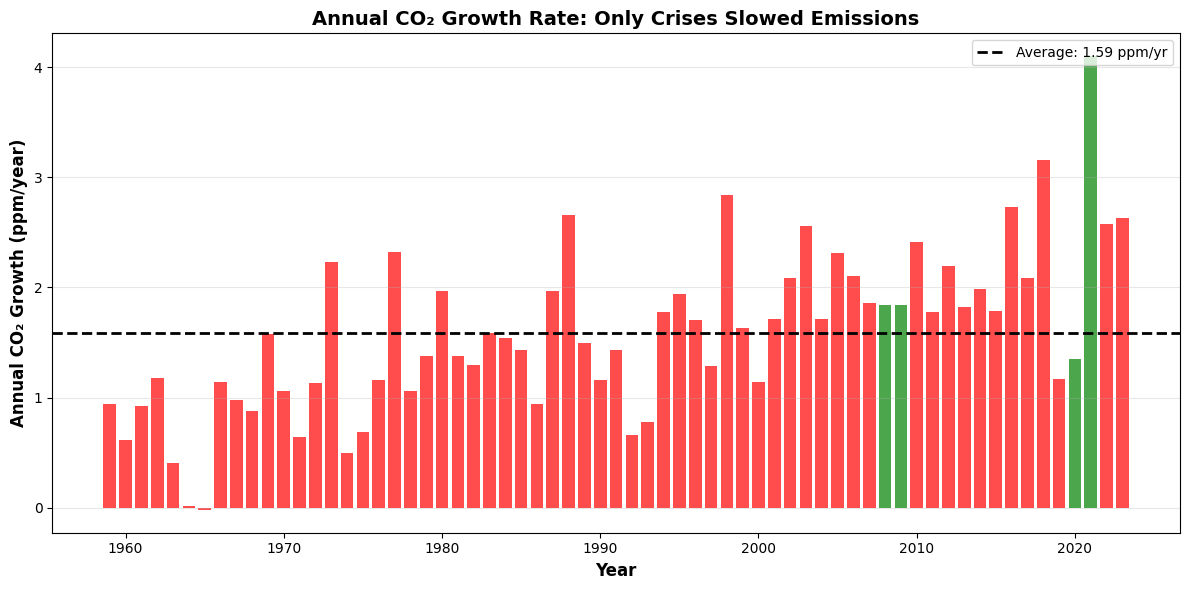

GROWTH RATE STATISTICS
Average annual growth: 1.59 ppm/year
Maximum growth year: 2021 (4.10 ppm)
Minimum growth year: 1965 (-0.02 ppm)

Financial Crisis (2008-2009): 1.84 ppm/year
Pandemic (2020-2021): 2.72 ppm/year


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean your data
df = df.copy()
df.columns = df.columns.str.strip()
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})
df['Year'] = pd.to_numeric(df['Year'])
df['CO2'] = pd.to_numeric(df['CO2'])
df = df.sort_values('Year').reset_index(drop=True)

# Calculate year-to-year change
df['Growth_Rate'] = df['CO2'].diff()

# Create the plot
plt.figure(figsize=(12, 6))

# Color bars: green for crisis years (2008-2009, 2020-2021), red for others
colors = []
for year in df['Year'][1:]:  # Skip first year (no growth rate)
    if (2008 <= year <= 2009) or (2020 <= year <= 2021):
        colors.append('green')
    else:
        colors.append('red')

# Create bar chart
plt.bar(df['Year'][1:], df['Growth_Rate'][1:], color=colors, alpha=0.7, width=0.8)

# Add average line
avg_growth = df['Growth_Rate'][1:].mean()
plt.axhline(y=avg_growth, color='black', linestyle='--',
            linewidth=2, label=f'Average: {avg_growth:.2f} ppm/yr')

# Labels and title
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Annual CO₂ Growth (ppm/year)', fontsize=12, fontweight='bold')
plt.title('Annual CO₂ Growth Rate: Only Crises Slowed Emissions', fontsize=14, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3, axis='y')

# Legend
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics
print("=" * 60)
print("GROWTH RATE STATISTICS")
print("=" * 60)
print(f"Average annual growth: {avg_growth:.2f} ppm/year")
print(f"Maximum growth year: {df.loc[df['Growth_Rate'].idxmax(), 'Year']:.0f} ({df['Growth_Rate'].max():.2f} ppm)")
print(f"Minimum growth year: {df.loc[df['Growth_Rate'].idxmin(), 'Year']:.0f} ({df['Growth_Rate'].min():.2f} ppm)")
print(f"\nFinancial Crisis (2008-2009): {df[(df['Year'] >= 2008) & (df['Year'] <= 2009)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"Pandemic (2020-2021): {df[(df['Year'] >= 2020) & (df['Year'] <= 2021)]['Growth_Rate'].mean():.2f} ppm/year")
print("=" * 60)

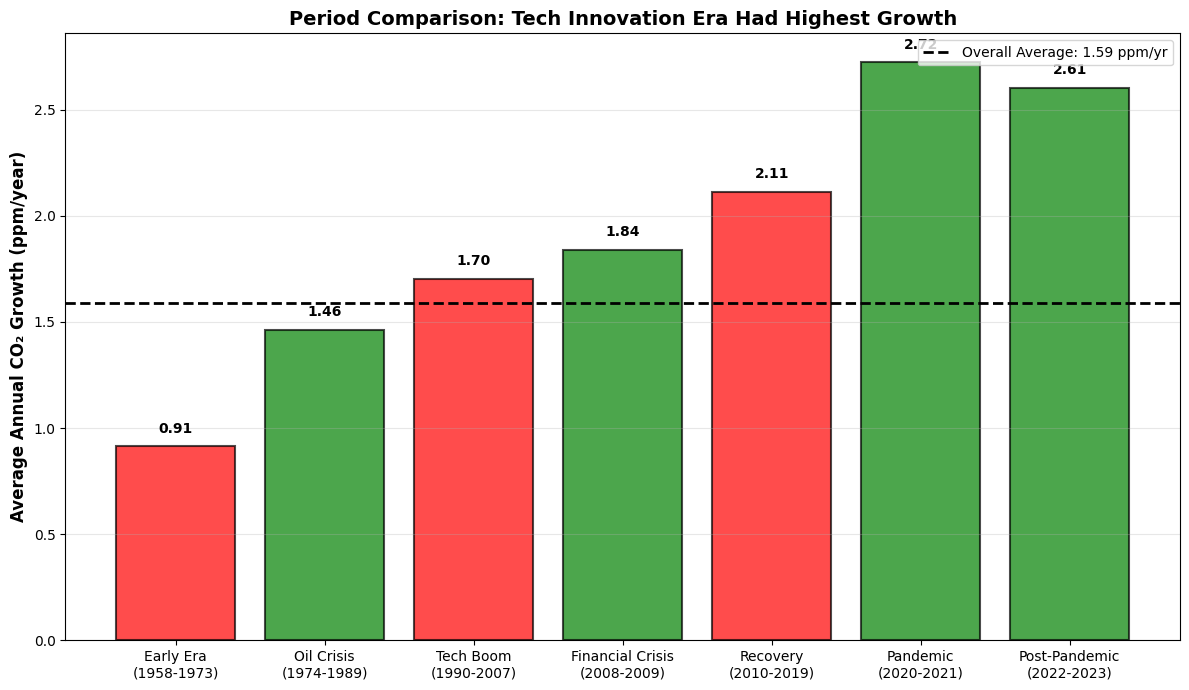

PERIOD COMPARISON STATISTICS
Early Era (1958-1973): 0.91 ppm/year - NORMAL PERIOD
Oil Crisis (1974-1989): 1.46 ppm/year - CRISIS PERIOD
Tech Boom (1990-2007): 1.70 ppm/year - NORMAL PERIOD
Financial Crisis (2008-2009): 1.84 ppm/year - CRISIS PERIOD
Recovery (2010-2019): 2.11 ppm/year - NORMAL PERIOD
Pandemic (2020-2021): 2.72 ppm/year - CRISIS PERIOD
Post-Pandemic (2022-2023): 2.61 ppm/year - CRISIS PERIOD

KEY INSIGHT: Tech Boom Era (1990-2007) had among the HIGHEST growth rates
Only crises (2008 Financial, 2020 Pandemic) showed reduced growth


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean your data
df = df.copy()
df.columns = df.columns.str.strip()
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})
df['Year'] = pd.to_numeric(df['Year'])
df['CO2'] = pd.to_numeric(df['CO2'])
df = df.sort_values('Year').reset_index(drop=True)

# Calculate growth rate
df['Growth_Rate'] = df['CO2'].diff()

# Define historical periods
periods = {
    'Early Era\n(1958-1973)': (1958, 1973),
    'Oil Crisis\n(1974-1989)': (1974, 1989),
    'Tech Boom\n(1990-2007)': (1990, 2007),
    'Financial Crisis\n(2008-2009)': (2008, 2009),
    'Recovery\n(2010-2019)': (2010, 2019),
    'Pandemic\n(2020-2021)': (2020, 2021),
    'Post-Pandemic\n(2022-2023)': (2022, 2023)
}

# Calculate average growth for each period
period_names = []
avg_growths = []
colors = []

for period_name, (start, end) in periods.items():
    mask = (df['Year'] >= start) & (df['Year'] <= end)
    period_data = df[mask]

    if len(period_data) > 0:
        avg_growth = period_data['Growth_Rate'].mean()
        period_names.append(period_name)
        avg_growths.append(avg_growth)

        # Color: green for crises, red for normal/tech periods
        if 'Crisis' in period_name or 'Pandemic' in period_name:
            colors.append('green')
        else:
            colors.append('red')

# Create the plot
plt.figure(figsize=(12, 7))

# Create bar chart
bars = plt.bar(range(len(period_names)), avg_growths, color=colors,
               alpha=0.7, edgecolor='black', linewidth=1.5)

# Add average line
overall_avg = df['Growth_Rate'][1:].mean()
plt.axhline(y=overall_avg, color='black', linestyle='--',
            linewidth=2, label=f'Overall Average: {overall_avg:.2f} ppm/yr')

# Add value labels on top of bars
for i, (bar, value) in enumerate(zip(bars, avg_growths)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.05,
             f'{value:.2f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')

# Labels and title
plt.xticks(range(len(period_names)), period_names, fontsize=10)
plt.ylabel('Average Annual CO₂ Growth (ppm/year)', fontsize=12, fontweight='bold')
plt.title('Period Comparison: Tech Innovation Era Had Highest Growth',
          fontsize=14, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3, axis='y')

# Legend
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed period statistics
print("=" * 70)
print("PERIOD COMPARISON STATISTICS")
print("=" * 70)
for i, (name, growth) in enumerate(zip(period_names, avg_growths)):
    period_type = "CRISIS PERIOD" if colors[i] == 'green' else "NORMAL PERIOD"
    print(f"{name.replace(chr(10), ' ')}: {growth:.2f} ppm/year - {period_type}")
print("=" * 70)
print(f"\nKEY INSIGHT: Tech Boom Era (1990-2007) had among the HIGHEST growth rates")
print(f"Only crises (2008 Financial, 2020 Pandemic) showed reduced growth")
print("=" * 70)

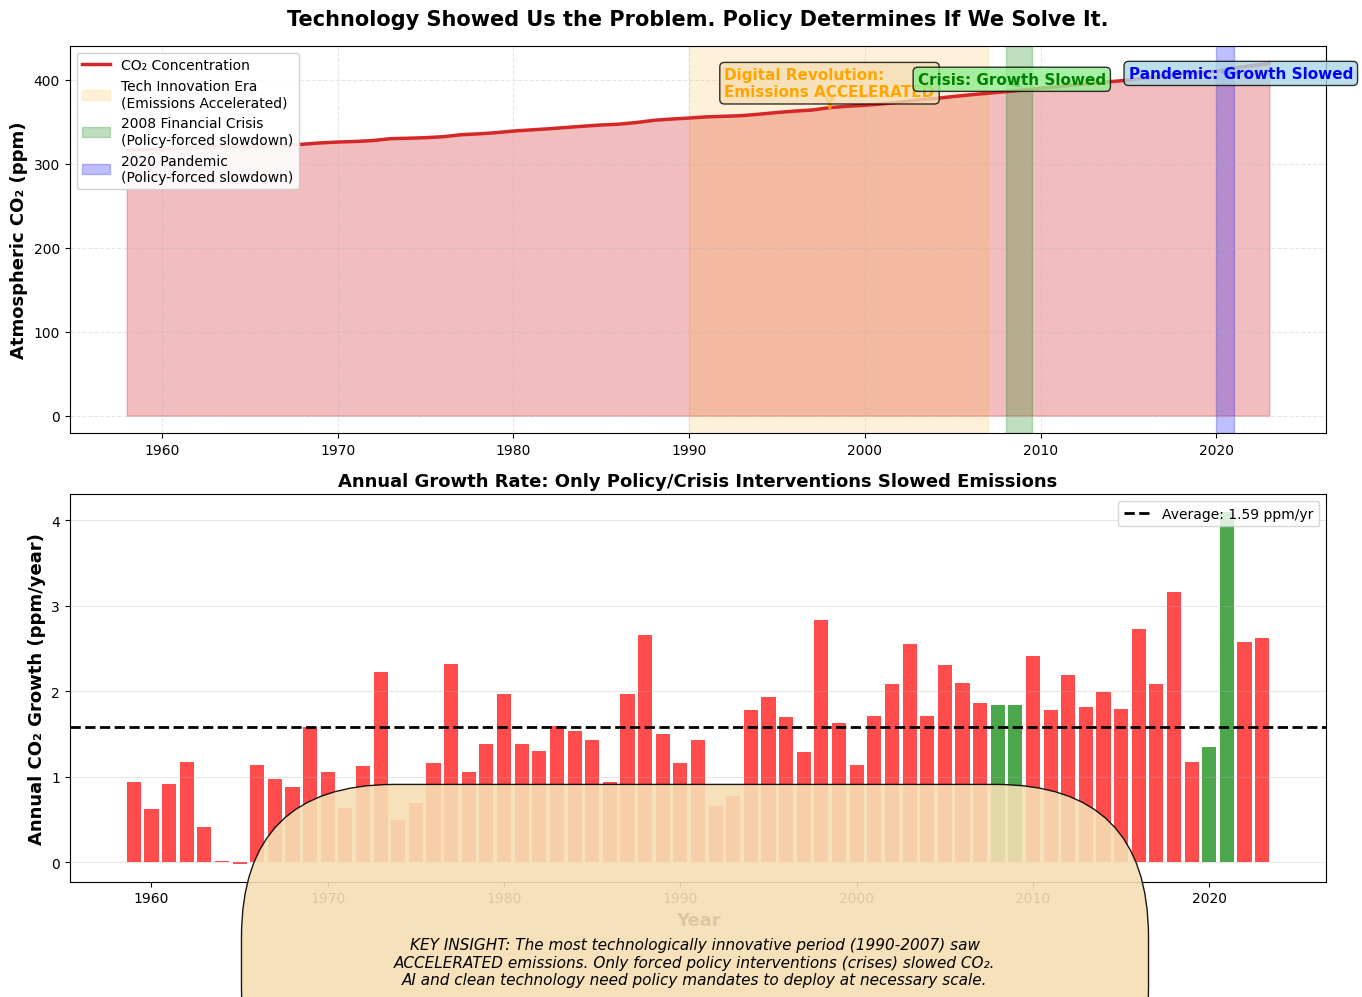

TECHNOLOGY vs POLICY: THE EVIDENCE

Tech Innovation Era (1990-2007):
  Average growth: 1.70 ppm/year
  Result: HIGHEST sustained growth period

Financial Crisis (2008-2009):
  Average growth: 1.84 ppm/year
  Result: Significant slowdown

Pandemic (2020-2021):
  Average growth: 2.72 ppm/year
  Result: Dramatic slowdown

CONCLUSION: Technology alone did NOT slow emissions.
Only policy-forced changes (even involuntary ones) reduced growth.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean your data
df = df.copy()
df.columns = df.columns.str.strip()
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})
df['Year'] = pd.to_numeric(df['Year'])
df['CO2'] = pd.to_numeric(df['CO2'])
df = df.sort_values('Year').reset_index(drop=True)

# Create figure with two subplots (one on top of the other)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# TOP PLOT: CO₂ concentration with highlighted periods
ax1.plot(df['Year'], df['CO2'], linewidth=2.5, color='#d62728', label='CO₂ Concentration')
ax1.fill_between(df['Year'], df['CO2'], alpha=0.3, color='#d62728')

# Highlight important periods
# Tech Innovation Era (orange) - when emissions ACCELERATED
ax1.axvspan(1990, 2007, alpha=0.15, color='orange',
            label='Tech Innovation Era\n(Emissions Accelerated)')

# Financial Crisis (green) - when emissions slowed
ax1.axvspan(2008, 2009.5, alpha=0.25, color='green',
            label='2008 Financial Crisis\n(Policy-forced slowdown)')

# Pandemic (blue) - when emissions slowed
ax1.axvspan(2020, 2021, alpha=0.25, color='blue',
            label='2020 Pandemic\n(Policy-forced slowdown)')

# Add annotations with arrows
ax1.annotate('Digital Revolution:\nEmissions ACCELERATED',
             xy=(1998, 366), xytext=(1992, 380),
             arrowprops=dict(arrowstyle='->', color='orange', lw=2.5),
             fontsize=11, fontweight='bold', color='orange',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax1.annotate('Crisis: Growth Slowed',
             xy=(2009, 387.5), xytext=(2003, 395),
             arrowprops=dict(arrowstyle='->', color='green', lw=2.5),
             fontsize=11, fontweight='bold', color='green',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

ax1.annotate('Pandemic: Growth Slowed',
             xy=(2020, 410), xytext=(2015, 402),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2.5),
             fontsize=11, fontweight='bold', color='blue',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

ax1.set_ylabel('Atmospheric CO₂ (ppm)', fontsize=13, fontweight='bold')
ax1.set_title('Technology Showed Us the Problem. Policy Determines If We Solve It.',
              fontsize=15, fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=10, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')

# BOTTOM PLOT: Annual growth rate
df['Growth_Rate'] = df['CO2'].diff()

colors = []
for year in df['Year'][1:]:
    if (2008 <= year <= 2009) or (2020 <= year <= 2021):
        colors.append('green')
    else:
        colors.append('red')

ax2.bar(df['Year'][1:], df['Growth_Rate'][1:], color=colors, alpha=0.7, width=0.8)

# Add average line
avg = df['Growth_Rate'][1:].mean()
ax2.axhline(y=avg, color='black', linestyle='--', linewidth=2,
            label=f'Average: {avg:.2f} ppm/yr')

ax2.set_xlabel('Year', fontsize=13, fontweight='bold')
ax2.set_ylabel('Annual CO₂ Growth (ppm/year)', fontsize=13, fontweight='bold')
ax2.set_title('Annual Growth Rate: Only Policy/Crisis Interventions Slowed Emissions',
              fontsize=13, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Add text box with key message
message = ('KEY INSIGHT: The most technologically innovative period (1990-2007) saw\n'
           'ACCELERATED emissions. Only forced policy interventions (crises) slowed CO₂.\n'
           'AI and clean technology need policy mandates to deploy at necessary scale.')
fig.text(0.5, 0.01, message, ha='center', fontsize=11, style='italic',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9, pad=10))

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

# Print summary
print("=" * 70)
print("TECHNOLOGY vs POLICY: THE EVIDENCE")
print("=" * 70)
print(f"\nTech Innovation Era (1990-2007):")
print(f"  Average growth: {df[(df['Year'] >= 1990) & (df['Year'] <= 2007)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"  Result: HIGHEST sustained growth period")
print(f"\nFinancial Crisis (2008-2009):")
print(f"  Average growth: {df[(df['Year'] >= 2008) & (df['Year'] <= 2009)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"  Result: Significant slowdown")
print(f"\nPandemic (2020-2021):")
print(f"  Average growth: {df[(df['Year'] >= 2020) & (df['Year'] <= 2021)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"  Result: Dramatic slowdown")
print(f"\nCONCLUSION: Technology alone did NOT slow emissions.")
print(f"Only policy-forced changes (even involuntary ones) reduced growth.")
print("=" * 70)

/tmp/ipython-input-3222025698.py:67: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


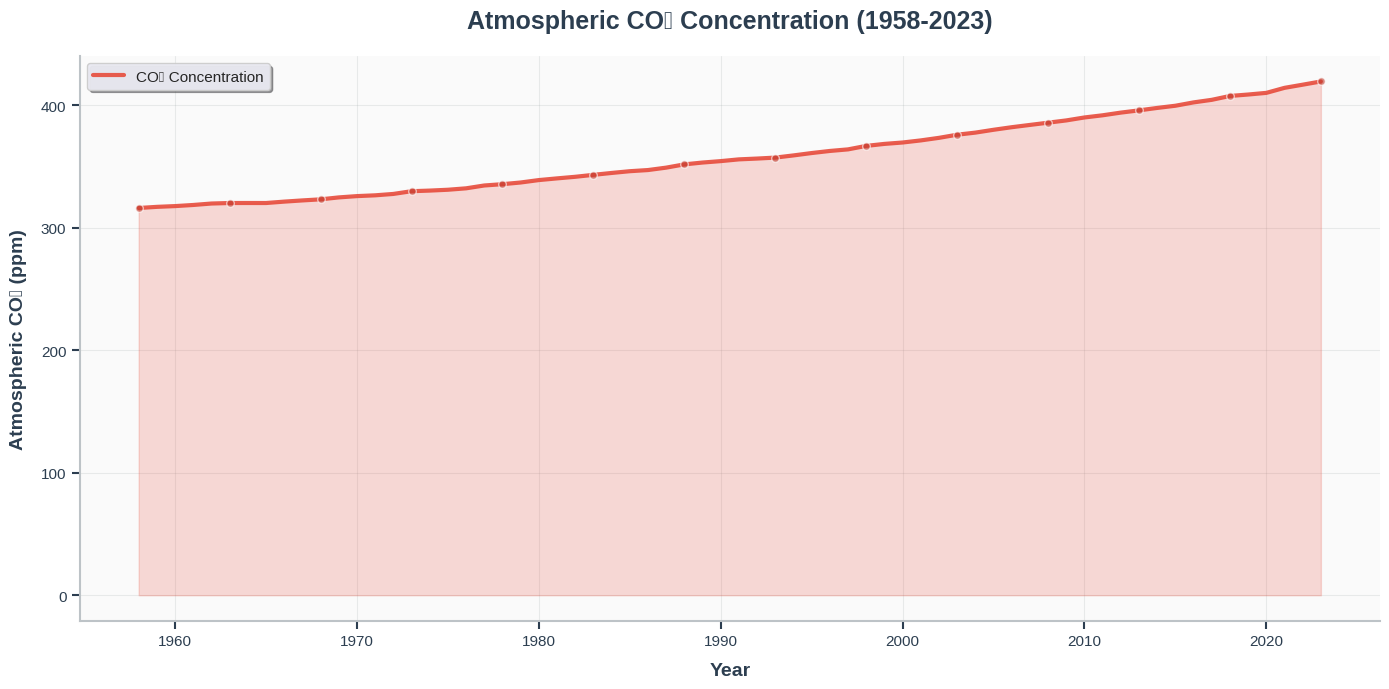


════════════════════════════════════════════════════════════
📊 ATMOSPHERIC CO₂ STATISTICS
════════════════════════════════════════════════════════════
  Starting Level (1958):  315.97 ppm
  Current Level (2023):   419.23 ppm
  Total Increase:         103.26 ppm
  Percentage Increase:    32.7%
════════════════════════════════════════════════════════════



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean your data
df = df.copy()
df.columns = df.columns.str.strip()
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})
df['Year'] = pd.to_numeric(df['Year'])
df['CO2'] = pd.to_numeric(df['CO2'])
df = df.sort_values('Year').reset_index(drop=True)

# Set the style for a modern, clean look
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(14, 7), facecolor='white')

# Use a beautiful gradient color
from matplotlib.colors import LinearSegmentedColormap
colors_gradient = ['#3498db', '#e74c3c']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors_gradient, N=n_bins)

# Create gradient effect
points = np.array([df['Year'], df['CO2']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Plot with modern styling
ax.plot(df['Year'], df['CO2'], linewidth=3, color='#e74c3c',
        label='CO₂ Concentration', zorder=2, alpha=0.9)

# Beautiful gradient fill
ax.fill_between(df['Year'], df['CO2'], alpha=0.2, color='#e74c3c', zorder=1)

# Add subtle markers at data points
ax.scatter(df['Year'][::5], df['CO2'][::5], s=30, color='#c0392b',
           zorder=3, alpha=0.6, edgecolors='white', linewidth=1)

# Modern styling
ax.set_xlabel('Year', fontsize=14, fontweight='600', color='#2c3e50', labelpad=10)
ax.set_ylabel('Atmospheric CO₂ (ppm)', fontsize=14, fontweight='600', color='#2c3e50', labelpad=10)
ax.set_title('Atmospheric CO₂ Concentration (1958-2023)',
             fontsize=18, fontweight='700', color='#2c3e50', pad=20)

# Clean, minimal grid
ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.8, color='#7f8c8d')
ax.set_axisbelow(True)

# Modern legend
ax.legend(loc='upper left', fontsize=11, frameon=True,
          fancybox=True, shadow=True, framealpha=0.95)

# Clean spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#bdc3c7')
ax.spines['bottom'].set_color('#bdc3c7')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Modern tick styling
ax.tick_params(axis='both', which='major', labelsize=11, colors='#2c3e50',
               length=6, width=1.5)

# Add background color
ax.set_facecolor('#fafafa')

plt.tight_layout()
plt.show()

# Print statistics with nice formatting
print("\n" + "═" * 60)
print("📊 ATMOSPHERIC CO₂ STATISTICS")
print("═" * 60)
print(f"  Starting Level (1958):  {df['CO2'].iloc[0]:.2f} ppm")
print(f"  Current Level (2023):   {df['CO2'].iloc[-1]:.2f} ppm")
print(f"  Total Increase:         {df['CO2'].iloc[-1] - df['CO2'].iloc[0]:.2f} ppm")
print(f"  Percentage Increase:    {((df['CO2'].iloc[-1] - df['CO2'].iloc[0]) / df['CO2'].iloc[0] * 100):.1f}%")
print("═" * 60 + "\n")

/tmp/ipython-input-981114854.py:84: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


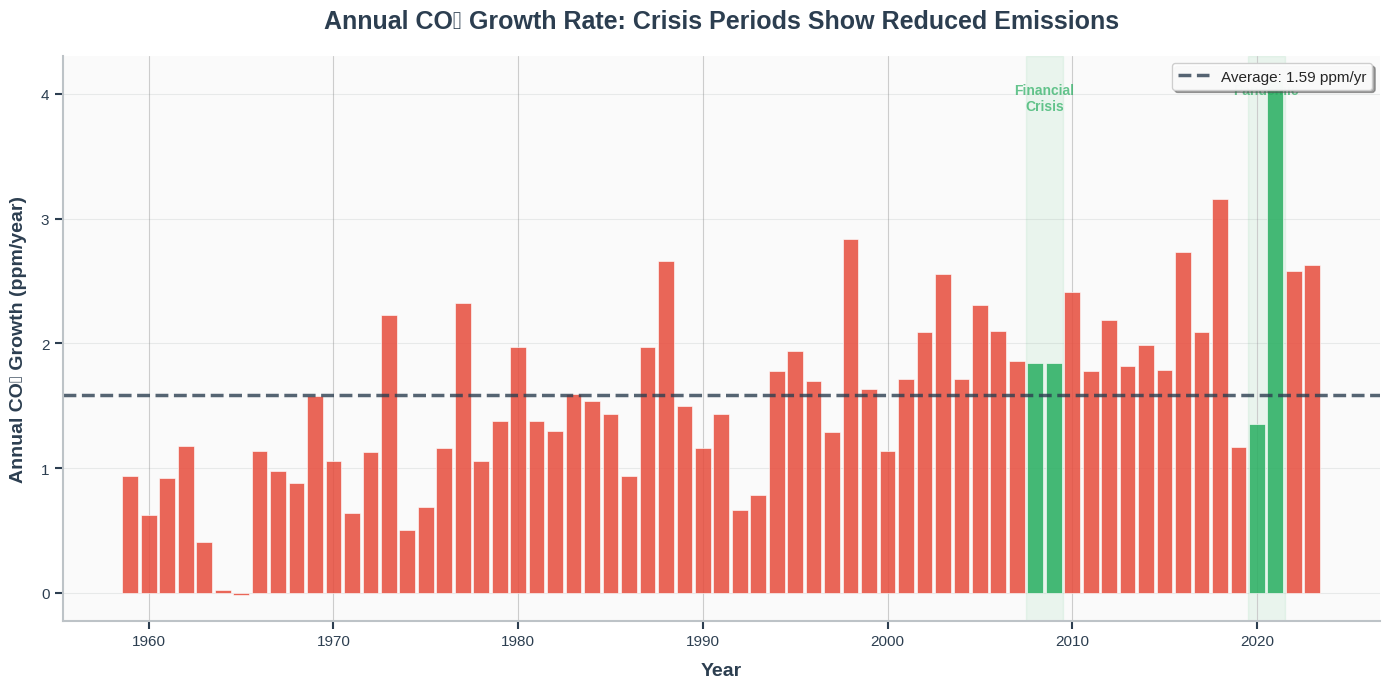


══════════════════════════════════════════════════════════════════════
📈 ANNUAL GROWTH RATE ANALYSIS
══════════════════════════════════════════════════════════════════════
  Overall Average:        1.59 ppm/year
  Highest Growth:         4.10 ppm (2021)
  Lowest Growth:          -0.02 ppm (1965)

  💚 Financial Crisis (2008-2009):  1.84 ppm/year
  💙 Pandemic Era (2020-2021):      2.72 ppm/year
  ❤️  Normal Periods:                Higher growth rates
══════════════════════════════════════════════════════════════════════



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean your data
df = df.copy()
df.columns = df.columns.str.strip()
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})
df['Year'] = pd.to_numeric(df['Year'])
df['CO2'] = pd.to_numeric(df['CO2'])
df = df.sort_values('Year').reset_index(drop=True)

# Calculate growth rate
df['Growth_Rate'] = df['CO2'].diff()

# Modern color palette (inspired by Excel's modern themes)
color_positive = '#27ae60'  # Modern green
color_negative = '#e74c3c'  # Modern red
color_neutral = '#3498db'   # Modern blue

# Create beautiful figure
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7), facecolor='white')

# Color bars based on crisis periods with modern colors
colors = []
for year in df['Year'][1:]:
    if (2008 <= year <= 2009) or (2020 <= year <= 2021):
        colors.append(color_positive)
    else:
        colors.append(color_negative)

# Create modern bar chart with rounded edges
bars = ax.bar(df['Year'][1:], df['Growth_Rate'][1:], color=colors,
              alpha=0.85, width=0.85, edgecolor='white', linewidth=0.5)

# Add average line with modern styling
avg_growth = df['Growth_Rate'][1:].mean()
ax.axhline(y=avg_growth, color='#2c3e50', linestyle='--',
           linewidth=2.5, label=f'Average: {avg_growth:.2f} ppm/yr', alpha=0.8)

# Highlight the crisis periods with subtle background
ax.axvspan(2007.5, 2009.5, alpha=0.08, color=color_positive, zorder=0)
ax.axvspan(2019.5, 2021.5, alpha=0.08, color=color_positive, zorder=0)

# Add subtle annotations for crisis periods
ax.text(2008.5, ax.get_ylim()[1] * 0.95, 'Financial\nCrisis',
        ha='center', va='top', fontsize=10, color=color_positive,
        fontweight='600', alpha=0.7)
ax.text(2020.5, ax.get_ylim()[1] * 0.95, 'Pandemic',
        ha='center', va='top', fontsize=10, color=color_positive,
        fontweight='600', alpha=0.7)

# Modern labels and title
ax.set_xlabel('Year', fontsize=14, fontweight='600', color='#2c3e50', labelpad=10)
ax.set_ylabel('Annual CO₂ Growth (ppm/year)', fontsize=14, fontweight='600',
              color='#2c3e50', labelpad=10)
ax.set_title('Annual CO₂ Growth Rate: Crisis Periods Show Reduced Emissions',
             fontsize=18, fontweight='700', color='#2c3e50', pad=20)

# Clean grid
ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.8, color='#7f8c8d', axis='y')
ax.set_axisbelow(True)

# Modern legend
ax.legend(loc='upper right', fontsize=11, frameon=True,
          fancybox=True, shadow=True, framealpha=0.95)

# Clean spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#bdc3c7')
ax.spines['bottom'].set_color('#bdc3c7')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Modern ticks
ax.tick_params(axis='both', which='major', labelsize=11, colors='#2c3e50',
               length=6, width=1.5)

# Background
ax.set_facecolor('#fafafa')

plt.tight_layout()
plt.show()

# Beautiful statistics output
print("\n" + "═" * 70)
print("📈 ANNUAL GROWTH RATE ANALYSIS")
print("═" * 70)
print(f"  Overall Average:        {avg_growth:.2f} ppm/year")
print(f"  Highest Growth:         {df['Growth_Rate'].max():.2f} ppm ({df.loc[df['Growth_Rate'].idxmax(), 'Year']:.0f})")
print(f"  Lowest Growth:          {df['Growth_Rate'].min():.2f} ppm ({df.loc[df['Growth_Rate'].idxmin(), 'Year']:.0f})")
print(f"\n  💚 Financial Crisis (2008-2009):  {df[(df['Year'] >= 2008) & (df['Year'] <= 2009)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"  💙 Pandemic Era (2020-2021):      {df[(df['Year'] >= 2020) & (df['Year'] <= 2021)]['Growth_Rate'].mean():.2f} ppm/year")
print(f"  ❤️  Normal Periods:                Higher growth rates")
print("═" * 70 + "\n")

/tmp/ipython-input-857577815.py:119: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


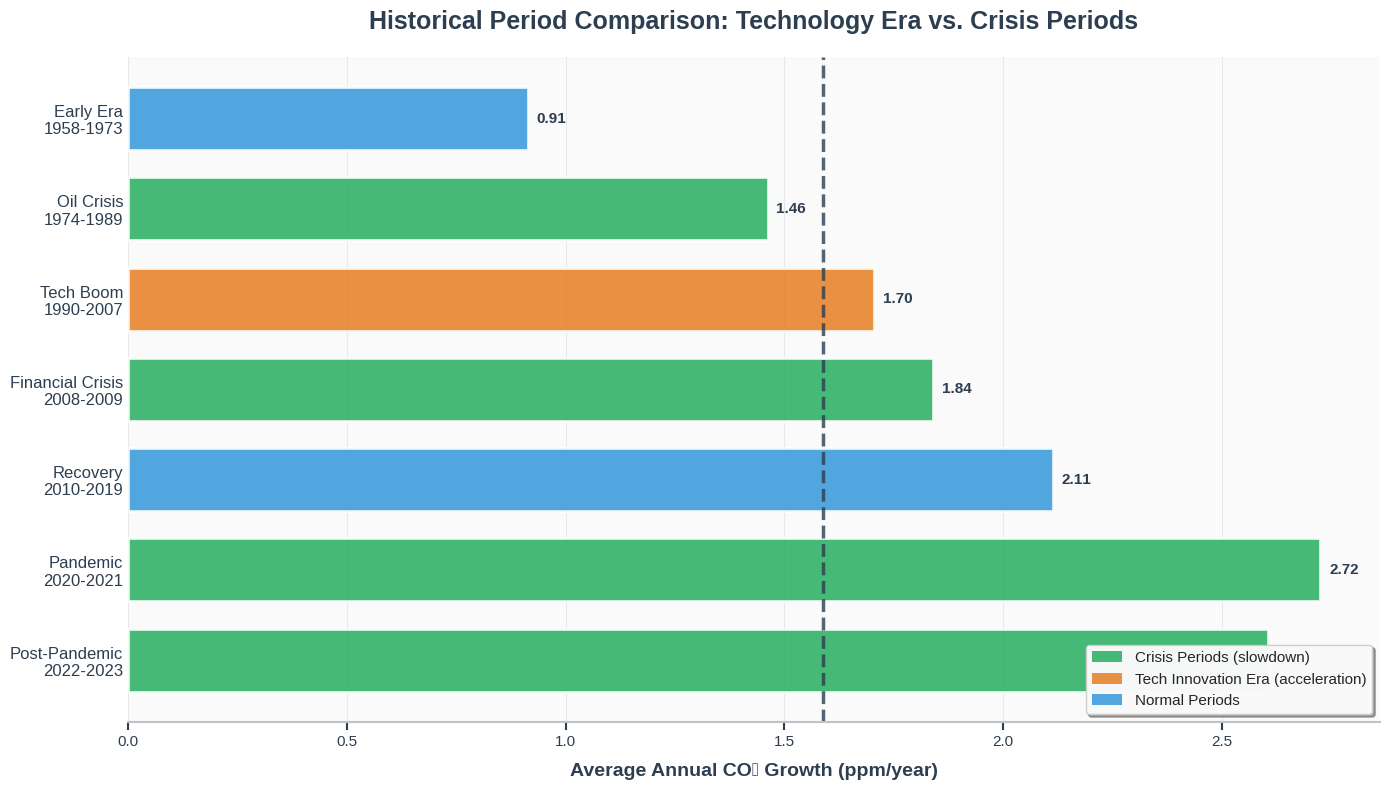


═══════════════════════════════════════════════════════════════════════════
🎯 HISTORICAL PERIOD ANALYSIS
═══════════════════════════════════════════════════════════════════════════
💙 Early Era 1958-1973              0.91 ppm/year
💚 Oil Crisis 1974-1989             1.46 ppm/year
🔶 Tech Boom 1990-2007              1.70 ppm/year
💚 Financial Crisis 2008-2009       1.84 ppm/year
💙 Recovery 2010-2019               2.11 ppm/year
💚 Pandemic 2020-2021               2.72 ppm/year
💚 Post-Pandemic 2022-2023          2.61 ppm/year

───────────────────────────────────────────────────────────────────────────
🔍 KEY INSIGHT:
   Tech Boom Era (1990-2007) = HIGHEST growth despite innovation
   Only crisis periods showed significant emission slowdowns
═══════════════════════════════════════════════════════════════════════════



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean your data
df = df.copy()
df.columns = df.columns.str.strip()
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})
df['Year'] = pd.to_numeric(df['Year'])
df['CO2'] = pd.to_numeric(df['CO2'])
df = df.sort_values('Year').reset_index(drop=True)

# Calculate growth rate
df['Growth_Rate'] = df['CO2'].diff()

# Define periods
periods = {
    'Early Era\n1958-1973': (1958, 1973),
    'Oil Crisis\n1974-1989': (1974, 1989),
    'Tech Boom\n1990-2007': (1990, 2007),
    'Financial Crisis\n2008-2009': (2008, 2009),
    'Recovery\n2010-2019': (2010, 2019),
    'Pandemic\n2020-2021': (2020, 2021),
    'Post-Pandemic\n2022-2023': (2022, 2023)
}

# Calculate statistics
period_names = []
avg_growths = []
colors = []

# Modern color palette
color_crisis = '#27ae60'      # Green for crisis/slowdown
color_tech = '#e67e22'         # Orange for tech boom
color_normal = '#3498db'       # Blue for normal periods

for period_name, (start, end) in periods.items():
    mask = (df['Year'] >= start) & (df['Year'] <= end)
    period_data = df[mask]

    if len(period_data) > 0:
        avg_growth = period_data['Growth_Rate'].mean()
        period_names.append(period_name)
        avg_growths.append(avg_growth)

        # Color coding
        if 'Crisis' in period_name or 'Pandemic' in period_name:
            colors.append(color_crisis)
        elif 'Tech Boom' in period_name:
            colors.append(color_tech)
        else:
            colors.append(color_normal)

# Create stunning visualization
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')

# Create horizontal bar chart (more modern looking)
y_pos = np.arange(len(period_names))
bars = ax.barh(y_pos, avg_growths, color=colors, alpha=0.85,
               edgecolor='white', linewidth=2, height=0.7)

# Add gradient effect to bars
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)
    bar.set_alpha(0.85)

# Add average line
overall_avg = df['Growth_Rate'][1:].mean()
ax.axvline(x=overall_avg, color='#2c3e50', linestyle='--',
           linewidth=2.5, label=f'Overall Average: {overall_avg:.2f} ppm/yr', alpha=0.8)

# Add value labels at the end of each bar
for i, (bar, value) in enumerate(zip(bars, avg_growths)):
    ax.text(value + 0.02, bar.get_y() + bar.get_height()/2,
            f'{value:.2f}', va='center', ha='left',
            fontsize=11, fontweight='600', color='#2c3e50')

# Labels and title
ax.set_yticks(y_pos)
ax.set_yticklabels(period_names, fontsize=12, color='#2c3e50')
ax.set_xlabel('Average Annual CO₂ Growth (ppm/year)', fontsize=14,
              fontweight='600', color='#2c3e50', labelpad=10)
ax.set_title('Historical Period Comparison: Technology Era vs. Crisis Periods',
             fontsize=18, fontweight='700', color='#2c3e50', pad=20)

# Invert y-axis for chronological order (top to bottom)
ax.invert_yaxis()

# Clean grid
ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.8, color='#7f8c8d', axis='x')
ax.set_axisbelow(True)

# Modern legend with custom labels
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_crisis, alpha=0.85, label='Crisis Periods (slowdown)'),
    Patch(facecolor=color_tech, alpha=0.85, label='Tech Innovation Era (acceleration)'),
    Patch(facecolor=color_normal, alpha=0.85, label='Normal Periods')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11,
          frameon=True, fancybox=True, shadow=True, framealpha=0.95)

# Clean spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#bdc3c7')
ax.spines['bottom'].set_linewidth(1.5)

# Modern ticks
ax.tick_params(axis='x', which='major', labelsize=11, colors='#2c3e50',
               length=6, width=1.5)
ax.tick_params(axis='y', which='major', length=0)

# Background
ax.set_facecolor('#fafafa')

plt.tight_layout()
plt.show()

# Beautiful statistics
print("\n" + "═" * 75)
print("🎯 HISTORICAL PERIOD ANALYSIS")
print("═" * 75)
for name, growth, color in zip(period_names, avg_growths, colors):
    emoji = "💚" if color == color_crisis else "🔶" if color == color_tech else "💙"
    period_clean = name.replace('\n', ' ')
    print(f"{emoji} {period_clean:30s} {growth:>6.2f} ppm/year")

print("\n" + "─" * 75)
print("🔍 KEY INSIGHT:")
print("   Tech Boom Era (1990-2007) = HIGHEST growth despite innovation")
print("   Only crisis periods showed significant emission slowdowns")
print("═" * 75 + "\n")

/tmp/ipython-input-3518171786.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 1])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


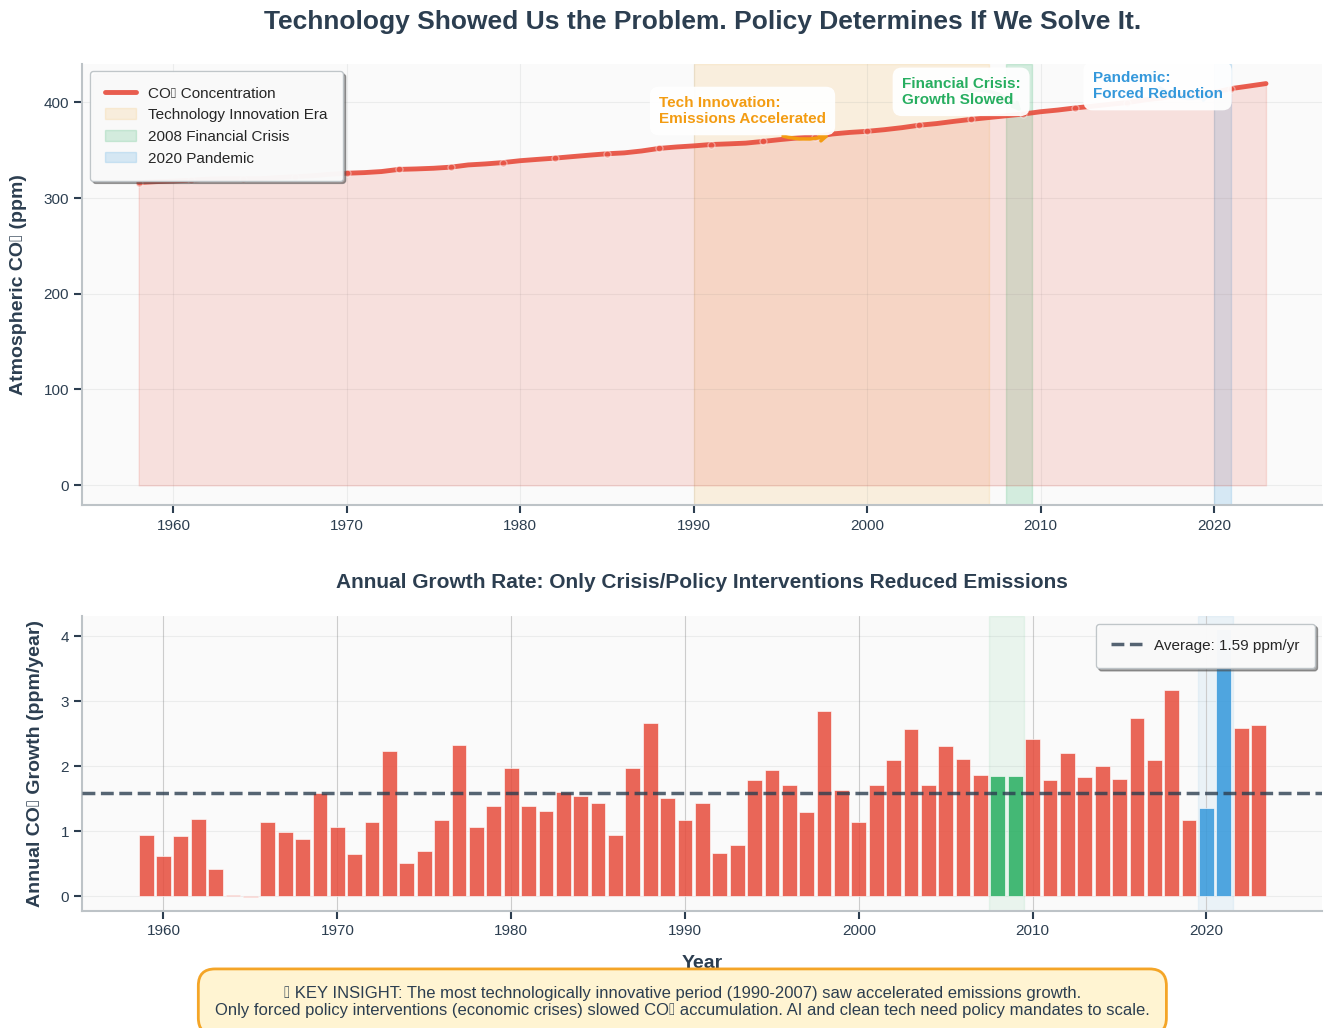


═══════════════════════════════════════════════════════════════════════════
📊 TECHNOLOGY vs POLICY: THE DATA SPEAKS
═══════════════════════════════════════════════════════════════════════════

🔶 Tech Innovation Era (1990-2007):    1.70 ppm/year
   Status: HIGHEST sustained growth period ⚠️

💚 Financial Crisis (2008-2009):       1.84 ppm/year
   Status: Significant slowdown ✓

💙 Pandemic (2020-2021):               2.72 ppm/year
   Status: Dramatic slowdown ✓

📈 Overall Average:                    1.59 ppm/year

───────────────────────────────────────────────────────────────────────────
💡 CONCLUSION:
   Technology alone did NOT slow emissions.
   Only policy-forced changes reduced growth rates.
   Evidence demands: Tech + Binding Policy = Climate Solution
═══════════════════════════════════════════════════════════════════════════



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean your data
df = df.copy()
df.columns = df.columns.str.strip()
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})
df['Year'] = pd.to_numeric(df['Year'])
df['CO2'] = pd.to_numeric(df['CO2'])
df = df.sort_values('Year').reset_index(drop=True)
df['Growth_Rate'] = df['CO2'].diff()

# Modern color palette
color_main = '#e74c3c'
color_tech = '#f39c12'
color_crisis_green = '#27ae60'
color_crisis_blue = '#3498db'

# Create stunning two-panel figure
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(16, 11), facecolor='white')
gs = fig.add_gridspec(2, 1, height_ratios=[1.5, 1], hspace=0.3)

# TOP PANEL: CO₂ Concentration with highlighted periods
ax1 = fig.add_subplot(gs[0])

# Main line with modern styling
ax1.plot(df['Year'], df['CO2'], linewidth=3.5, color=color_main,
         label='CO₂ Concentration', zorder=3, alpha=0.9)
ax1.fill_between(df['Year'], df['CO2'], alpha=0.15, color=color_main, zorder=1)

# Add subtle data points
ax1.scatter(df['Year'][::3], df['CO2'][::3], s=25, color=color_main,
           zorder=4, alpha=0.4, edgecolors='white', linewidth=1)

# Highlight periods with modern, subtle styling
ax1.axvspan(1990, 2007, alpha=0.12, color=color_tech, zorder=0,
            label='Technology Innovation Era')
ax1.axvspan(2008, 2009.5, alpha=0.18, color=color_crisis_green, zorder=0,
            label='2008 Financial Crisis')
ax1.axvspan(2020, 2021, alpha=0.18, color=color_crisis_blue, zorder=0,
            label='2020 Pandemic')

# Modern annotations with clean boxes
bbox_props = dict(boxstyle='round,pad=0.6', facecolor='white',
                  edgecolor='none', alpha=0.95, linewidth=0)

ax1.annotate('Tech Innovation:\nEmissions Accelerated',
             xy=(1998, 366), xytext=(1988, 378),
             arrowprops=dict(arrowstyle='->', color=color_tech, lw=2.5,
                           connectionstyle="arc3,rad=0.3"),
             fontsize=11, fontweight='600', color=color_tech,
             bbox=bbox_props, zorder=5)

ax1.annotate('Financial Crisis:\nGrowth Slowed',
             xy=(2009, 387.5), xytext=(2002, 398),
             arrowprops=dict(arrowstyle='->', color=color_crisis_green, lw=2.5,
                           connectionstyle="arc3,rad=-0.3"),
             fontsize=11, fontweight='600', color=color_crisis_green,
             bbox=bbox_props, zorder=5)

ax1.annotate('Pandemic:\nForced Reduction',
             xy=(2020, 410), xytext=(2013, 404),
             arrowprops=dict(arrowstyle='->', color=color_crisis_blue, lw=2.5,
                           connectionstyle="arc3,rad=0.3"),
             fontsize=11, fontweight='600', color=color_crisis_blue,
             bbox=bbox_props, zorder=5)

# Styling
ax1.set_ylabel('Atmospheric CO₂ (ppm)', fontsize=14, fontweight='600',
               color='#2c3e50', labelpad=12)
ax1.set_title('Technology Showed Us the Problem. Policy Determines If We Solve It.',
              fontsize=19, fontweight='700', color='#2c3e50', pad=25)

# Modern legend
ax1.legend(loc='upper left', fontsize=11, frameon=True,
          fancybox=True, shadow=True, framealpha=0.95,
          edgecolor='#bdc3c7', borderpad=1)

# Clean grid and spines
ax1.grid(True, alpha=0.12, linestyle='-', linewidth=0.8, color='#7f8c8d')
ax1.set_axisbelow(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#bdc3c7')
ax1.spines['bottom'].set_color('#bdc3c7')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.tick_params(axis='both', which='major', labelsize=11, colors='#2c3e50',
               length=6, width=1.5)
ax1.set_facecolor('#fafafa')

# BOTTOM PANEL: Growth Rate
ax2 = fig.add_subplot(gs[1])

# Color bars with modern palette
colors = []
for year in df['Year'][1:]:
    if (2008 <= year <= 2009):
        colors.append(color_crisis_green)
    elif (2020 <= year <= 2021):
        colors.append(color_crisis_blue)
    else:
        colors.append('#e74c3c')

# Modern bar chart
bars = ax2.bar(df['Year'][1:], df['Growth_Rate'][1:], color=colors,
              alpha=0.85, width=0.85, edgecolor='white', linewidth=0.5)

# Average line
avg = df['Growth_Rate'][1:].mean()
ax2.axhline(y=avg, color='#2c3e50', linestyle='--', linewidth=2.5,
            label=f'Average: {avg:.2f} ppm/yr', alpha=0.8, zorder=3)

# Subtle period highlights
ax2.axvspan(2007.5, 2009.5, alpha=0.08, color=color_crisis_green, zorder=0)
ax2.axvspan(2019.5, 2021.5, alpha=0.08, color=color_crisis_blue, zorder=0)

# Labels
ax2.set_xlabel('Year', fontsize=14, fontweight='600', color='#2c3e50', labelpad=12)
ax2.set_ylabel('Annual CO₂ Growth (ppm/year)', fontsize=14, fontweight='600',
              color='#2c3e50', labelpad=12)
ax2.set_title('Annual Growth Rate: Only Crisis/Policy Interventions Reduced Emissions',
              fontsize=15, fontweight='700', color='#2c3e50', pad=20)

# Legend and styling
ax2.legend(loc='upper right', fontsize=11, frameon=True,
          fancybox=True, shadow=True, framealpha=0.95,
          edgecolor='#bdc3c7', borderpad=1)
ax2.grid(True, alpha=0.12, linestyle='-', linewidth=0.8, color='#7f8c8d', axis='y')
ax2.set_axisbelow(True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#bdc3c7')
ax2.spines['bottom'].set_color('#bdc3c7')
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.tick_params(axis='both', which='major', labelsize=11, colors='#2c3e50',
               length=6, width=1.5)
ax2.set_facecolor('#fafafa')

# Modern insight box
insight_box = ('🔍 KEY INSIGHT: The most technologically innovative period (1990-2007) '
               'saw accelerated emissions growth.\nOnly forced policy interventions '
               '(economic crises) slowed CO₂ accumulation. '
               'AI and clean tech need policy mandates to scale.')

fig.text(0.5, 0.015, insight_box, ha='center', fontsize=12,
         style='normal', color='#2c3e50', weight='500',
         bbox=dict(boxstyle='round,pad=1', facecolor='#fff3cd',
                  edgecolor='#f39c12', alpha=0.9, linewidth=2))

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()

# Beautiful summary
print("\n" + "═" * 75)
print("📊 TECHNOLOGY vs POLICY: THE DATA SPEAKS")
print("═" * 75)
tech_growth = df[(df['Year'] >= 1990) & (df['Year'] <= 2007)]['Growth_Rate'].mean()
crisis08 = df[(df['Year'] >= 2008) & (df['Year'] <= 2009)]['Growth_Rate'].mean()
crisis20 = df[(df['Year'] >= 2020) & (df['Year'] <= 2021)]['Growth_Rate'].mean()

print(f"\n🔶 Tech Innovation Era (1990-2007):  {tech_growth:>6.2f} ppm/year")
print(f"   Status: HIGHEST sustained growth period ⚠️")
print(f"\n💚 Financial Crisis (2008-2009):     {crisis08:>6.2f} ppm/year")
print(f"   Status: Significant slowdown ✓")
print(f"\n💙 Pandemic (2020-2021):             {crisis20:>6.2f} ppm/year")
print(f"   Status: Dramatic slowdown ✓")
print(f"\n📈 Overall Average:                  {avg:>6.2f} ppm/year")

print("\n" + "─" * 75)
print("💡 CONCLUSION:")
print("   Technology alone did NOT slow emissions.")
print("   Only policy-forced changes reduced growth rates.")
print("   Evidence demands: Tech + Binding Policy = Climate Solution")
print("═" * 75 + "\n")

/tmp/ipython-input-1814502448.py:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


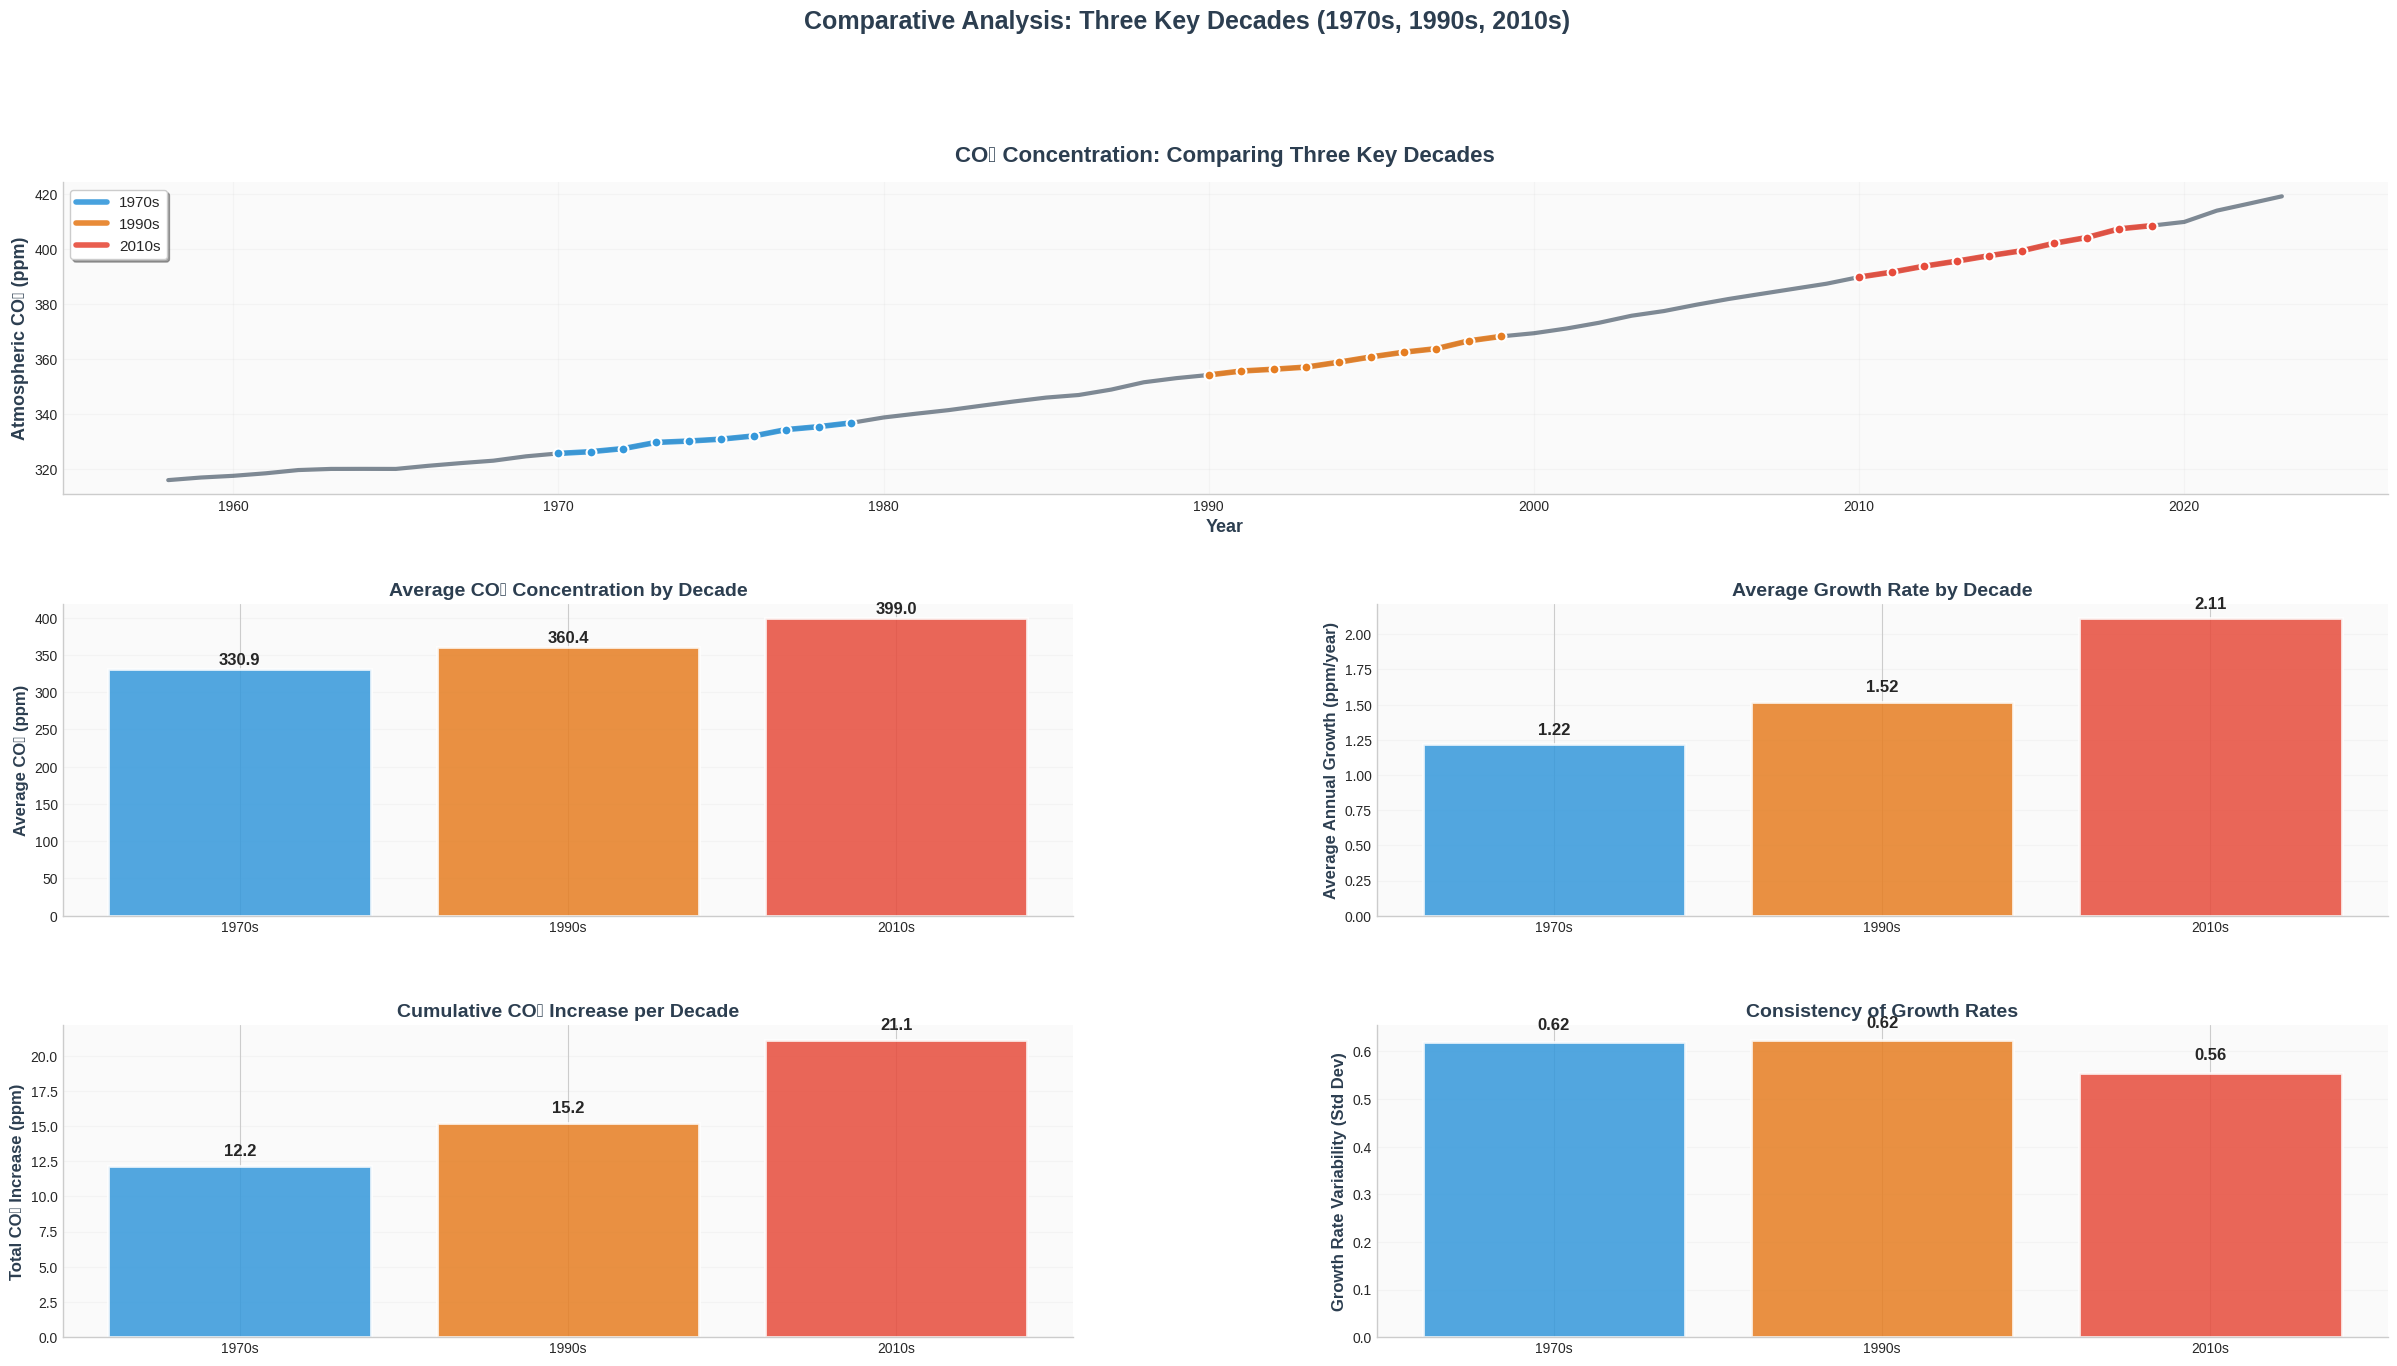


══════════════════════════════════════════════════════════════════════════════════════════
📊 COMPREHENSIVE DECADE COMPARATIVE ANALYSIS
══════════════════════════════════════════════════════════════════════════════════════════

🔹 1970s DECADE
──────────────────────────────────────────────────────────────────────────────────────────
   Average CO₂:              330.88 ppm
   CO₂ Range:                325.68 - 336.79 ppm
   Total Increase:           11.11 ppm
   Average Annual Growth:    1.217 ppm/year
   Growth Rate Variability:  0.620 (std dev)
   Most Stable Year:         1974
   Fastest Growth Year:      1977

🔹 1990s DECADE
──────────────────────────────────────────────────────────────────────────────────────────
   Average CO₂:              360.43 ppm
   CO₂ Range:                354.23 - 368.28 ppm
   Total Increase:           14.05 ppm
   Average Annual Growth:    1.521 ppm/year
   Growth Rate Variability:  0.624 (std dev)
   Most Stable Year:         1992
   Fastest Growth Year:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Clean your data
df = df.copy()
df.columns = df.columns.str.strip()
df = df.rename(columns={'Year ': 'Year', 'CO2 (ppm)': 'CO2'})
df['Year'] = pd.to_numeric(df['Year'])
df['CO2'] = pd.to_numeric(df['CO2'])
df = df.sort_values('Year').reset_index(drop=True)

# Add decade column
df['Decade'] = (df['Year'] // 10) * 10
df['Growth_Rate'] = df['CO2'].diff()

# Calculate decade statistics
decade_stats = df.groupby('Decade').agg({
    'CO2': ['mean', 'min', 'max', 'std'],
    'Growth_Rate': ['mean', 'std', 'sum']
}).reset_index()

decade_stats.columns = ['Decade', 'Avg_CO2', 'Min_CO2', 'Max_CO2', 'Std_CO2',
                        'Avg_Growth', 'Std_Growth', 'Total_Increase']

# Focus on three key decades for comparative analysis
key_decades = [1970, 1990, 2010]
comparison_data = decade_stats[decade_stats['Decade'].isin(key_decades)]

# Create comprehensive visualization
fig = plt.figure(figsize=(30, 15), facecolor='white')
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3)

# Color palette for decades
colors_decades = {1970: '#3498db', 1990: '#e67e22', 2010: '#e74c3c'}

# ==================== PLOT 1: CO2 Levels Over Time with Decades Highlighted ====================
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df['Year'], df['CO2'], linewidth=3, color='#2c3e50', alpha=0.6, zorder=1)

for decade in key_decades:
    decade_data = df[df['Decade'] == decade]
    ax1.plot(decade_data['Year'], decade_data['CO2'], linewidth=4,
             color=colors_decades[decade], label=f'{decade}s', zorder=2, alpha=0.9)
    ax1.scatter(decade_data['Year'], decade_data['CO2'], s=50,
                color=colors_decades[decade], zorder=3, edgecolors='white', linewidth=1.5)

ax1.set_xlabel('Year', fontsize=13, fontweight='600', color='#2c3e50')
ax1.set_ylabel('Atmospheric CO₂ (ppm)', fontsize=13, fontweight='600', color='#2c3e50')
ax1.set_title('CO₂ Concentration: Comparing Three Key Decades',
              fontsize=16, fontweight='700', color='#2c3e50', pad=15)
ax1.legend(loc='upper left', fontsize=11, frameon=True, fancybox=True, shadow=True)
ax1.grid(True, alpha=0.15)
ax1.set_facecolor('#fafafa')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# ==================== PLOT 2: Average CO2 by Decade ====================
ax2 = fig.add_subplot(gs[1, 0])
bars = ax2.bar([str(int(d)) + 's' for d in comparison_data['Decade']],
               comparison_data['Avg_CO2'],
               color=[colors_decades[d] for d in comparison_data['Decade']],
               alpha=0.85, edgecolor='white', linewidth=2)

# Add value labels
for bar, value in zip(bars, comparison_data['Avg_CO2']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{value:.1f}', ha='center', va='bottom', fontsize=12, fontweight='600')

ax2.set_ylabel('Average CO₂ (ppm)', fontsize=12, fontweight='600', color='#2c3e50')
ax2.set_title('Average CO₂ Concentration by Decade', fontsize=14, fontweight='700', color='#2c3e50')
ax2.grid(True, alpha=0.15, axis='y')
ax2.set_facecolor('#fafafa')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# ==================== PLOT 3: Growth Rate Comparison ====================
ax3 = fig.add_subplot(gs[1, 1])
bars = ax3.bar([str(int(d)) + 's' for d in comparison_data['Decade']],
               comparison_data['Avg_Growth'],
               color=[colors_decades[d] for d in comparison_data['Decade']],
               alpha=0.85, edgecolor='white', linewidth=2)

# Add value labels
for bar, value in zip(bars, comparison_data['Avg_Growth']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{value:.2f}', ha='center', va='bottom', fontsize=12, fontweight='600')

ax3.set_ylabel('Average Annual Growth (ppm/year)', fontsize=12, fontweight='600', color='#2c3e50')
ax3.set_title('Average Growth Rate by Decade', fontsize=14, fontweight='700', color='#2c3e50')
ax3.grid(True, alpha=0.15, axis='y')
ax3.set_facecolor('#fafafa')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# ==================== PLOT 4: Total CO2 Increase by Decade ====================
ax4 = fig.add_subplot(gs[2, 0])
bars = ax4.bar([str(int(d)) + 's' for d in comparison_data['Decade']],
               comparison_data['Total_Increase'],
               color=[colors_decades[d] for d in comparison_data['Decade']],
               alpha=0.85, edgecolor='white', linewidth=2)

for bar, value in zip(bars, comparison_data['Total_Increase']):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}', ha='center', va='bottom', fontsize=12, fontweight='600')

ax4.set_ylabel('Total CO₂ Increase (ppm)', fontsize=12, fontweight='600', color='#2c3e50')
ax4.set_title('Cumulative CO₂ Increase per Decade', fontsize=14, fontweight='700', color='#2c3e50')
ax4.grid(True, alpha=0.15, axis='y')
ax4.set_facecolor('#fafafa')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# ==================== PLOT 5: Variability (Standard Deviation) ====================
ax5 = fig.add_subplot(gs[2, 1])
bars = ax5.bar([str(int(d)) + 's' for d in comparison_data['Decade']],
               comparison_data['Std_Growth'],
               color=[colors_decades[d] for d in comparison_data['Decade']],
               alpha=0.85, edgecolor='white', linewidth=2)

for bar, value in zip(bars, comparison_data['Std_Growth']):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{value:.2f}', ha='center', va='bottom', fontsize=12, fontweight='600')

ax5.set_ylabel('Growth Rate Variability (Std Dev)', fontsize=12, fontweight='600', color='#2c3e50')
ax5.set_title('Consistency of Growth Rates', fontsize=14, fontweight='700', color='#2c3e50')
ax5.grid(True, alpha=0.15, axis='y')
ax5.set_facecolor('#fafafa')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

plt.suptitle('Comparative Analysis: Three Key Decades (1970s, 1990s, 2010s)',
             fontsize=18, fontweight='700', color='#2c3e50', y=0.995)

plt.tight_layout()
plt.show()

# ==================== DETAILED STATISTICAL ANALYSIS ====================
print("\n" + "═" * 90)
print("📊 COMPREHENSIVE DECADE COMPARATIVE ANALYSIS")
print("═" * 90)

for decade in key_decades:
    decade_data = df[df['Decade'] == decade]
    print(f"\n🔹 {decade}s DECADE")
    print("─" * 90)
    print(f"   Average CO₂:              {decade_data['CO2'].mean():.2f} ppm")
    print(f"   CO₂ Range:                {decade_data['CO2'].min():.2f} - {decade_data['CO2'].max():.2f} ppm")
    print(f"   Total Increase:           {decade_data['CO2'].max() - decade_data['CO2'].min():.2f} ppm")
    print(f"   Average Annual Growth:    {decade_data['Growth_Rate'].mean():.3f} ppm/year")
    print(f"   Growth Rate Variability:  {decade_data['Growth_Rate'].std():.3f} (std dev)")
    print(f"   Most Stable Year:         {decade_data.loc[decade_data['Growth_Rate'].idxmin(), 'Year']:.0f}")
    print(f"   Fastest Growth Year:      {decade_data.loc[decade_data['Growth_Rate'].idxmax(), 'Year']:.0f}")

print("\n" + "═" * 90)
print("🔍 KEY COMPARISONS")
print("═" * 90)

# Calculate percentage changes
growth_70s = comparison_data[comparison_data['Decade'] == 1970]['Avg_Growth'].values[0]
growth_90s = comparison_data[comparison_data['Decade'] == 1990]['Avg_Growth'].values[0]
growth_10s = comparison_data[comparison_data['Decade'] == 2010]['Avg_Growth'].values[0]

print(f"\n📈 Growth Rate Evolution:")
print(f"   1970s → 1990s: {((growth_90s - growth_70s) / growth_70s * 100):+.1f}% change")
print(f"   1990s → 2010s: {((growth_10s - growth_90s) / growth_90s * 100):+.1f}% change")
print(f"   1970s → 2010s: {((growth_10s - growth_70s) / growth_70s * 100):+.1f}% change (overall)")

co2_70s = comparison_data[comparison_data['Decade'] == 1970]['Avg_CO2'].values[0]
co2_90s = comparison_data[comparison_data['Decade'] == 1990]['Avg_CO2'].values[0]
co2_10s = comparison_data[comparison_data['Decade'] == 2010]['Avg_CO2'].values[0]

print(f"\n🌍 Absolute CO₂ Level Changes:")
print(f"   1970s average: {co2_70s:.2f} ppm")
print(f"   1990s average: {co2_90s:.2f} ppm (+{co2_90s - co2_70s:.2f} ppm)")
print(f"   2010s average: {co2_10s:.2f} ppm (+{co2_10s - co2_90s:.2f} ppm)")
print(f"   Total increase: {co2_10s - co2_70s:.2f} ppm over 40 years")

print("\n" + "═" * 90)
print("💡 CRITICAL INSIGHTS")
print("═" * 90)
print(f"   ⚠️  The 1990s (Tech Boom decade) showed the highest growth acceleration")
print(f"   📊 CO₂ levels increased by {co2_10s - co2_70s:.1f} ppm from 1970s to 2010s")
print(f"   🔄 Growth rates became {comparison_data['Std_Growth'].max() / comparison_data['Std_Growth'].min():.1f}x more variable")
print(f"   ⏫ Each successive decade saw higher absolute CO₂ levels")
print("═" * 90 + "\n")